In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from math import sqrt
import warnings
warnings.filterwarnings('ignore')



---

# **Business Assist – Sales & Profit Analytics for Small Vendors**

## **Problem Statement**

Small business vendors often struggle to understand how pricing, customer footfall, promotions, and stock levels influence their daily revenue and profit. Without data-driven insights, vendors may set incorrect prices, offer ineffective discounts, or maintain poor inventory balance, resulting in reduced profitability.

This study aims to use statistical analysis to explore the relationships among key business variables such as **unit price, revenue, profit, units sold, and customer trends**. The objective is to identify factors that significantly affect business performance and to build predictive models that help vendors make informed decisions.

---

## **Research Questions**

1. **How strongly does revenue influence profit, and can daily profit be accurately predicted using revenue values?**
2. **How do pricing strategies affect revenue and profit among small vendors?**
3. **Which numerical factors show significant linear relationships, and how can they be used to forecast future business outcomes?**
4. **And so on…**

---






# **Main Problem Statement**

1. **Analyze how pricing, promotions, and customer trends affect sales and profits** using statistical methods.
2. **Identify key factors** influencing revenue, including **seasonal patterns** and **pricing strategies**.
3. **Enable data-driven decision-making** to improve business performance and **maximize profitability**.



#  DATA CLEANING PROCESS

In [120]:
data = pd.read_csv('/Users/sachindev/Downloads/small_vendor_sales_data.csv')
data.head()

,Vendor_ID,Store_Type,Location_Type,Date,Weekday,Product_ID,Product_Category,Unit_Price,Units_Sold,Revenue,Stock_On_Hand,Discount_Pct,Promotion_Flag,Footfall_Estimate,Return_Rate
0,V003,Boutique,Mall,2025-08-21,Thursday,P013,Stationery,27.38,2,54.76,139,0,Yes,217,4.43
1,V001,Boutique,Residential,2025-07-15,Tuesday,P046,Beverages,176.72,8,1343.07,80,5,No,88,1.11
2,V001,StreetFood,Residential,2025-09-10,Wednesday,P045,Beverages,60.46,2,108.83,49,10,No,162,3.57
3,V004,StreetFood,Mall,2025-08-30,Saturday,P030,Snacks,34.61,11,380.71,28,0,No,294,4.41
4,V003,Stationery,Residential,2025-07-21,Monday,P062,PersonalCare,178.86,9,1609.74,83,0,Yes,200,3.66


# DATA INFORMATION

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vendor_ID          300 non-null    object 
 1   Store_Type         300 non-null    object 
 2   Location_Type      300 non-null    object 
 3   Date               300 non-null    object 
 4   Weekday            300 non-null    object 
 5   Product_ID         300 non-null    object 
 6   Product_Category   300 non-null    object 
 7   Unit_Price         300 non-null    float64
 8   Units_Sold         300 non-null    int64  
 9   Revenue            300 non-null    float64
 10  Stock_On_Hand      300 non-null    int64  
 11  Discount_Pct       300 non-null    int64  
 12  Promotion_Flag     300 non-null    object 
 13  Footfall_Estimate  300 non-null    int64  
 14  Return_Rate        300 non-null    float64
dtypes: float64(3), int64(4), object(8)
memory usage: 35.3+ KB


## CHECKING FOR NULL VALUES

In [122]:
data.isnull().sum()

Vendor_ID            0
Store_Type           0
Location_Type        0
Date                 0
Weekday              0
Product_ID           0
Product_Category     0
Unit_Price           0
Units_Sold           0
Revenue              0
Stock_On_Hand        0
Discount_Pct         0
Promotion_Flag       0
Footfall_Estimate    0
Return_Rate          0
dtype: int64

### Prints the counts and percentages of each unique 
### value for every Categorical column in the dataset.

In [123]:
for cols in data.columns:
    if data[cols].dtype == 'object':
        print(f"Frequency table for {cols}:")
        print(data[cols].value_counts())
        print(data[cols].value_counts(normalize=True))
        print("\n")

Frequency table for Vendor_ID:
Vendor_ID
V005    69
V004    61
V002    61
V001    59
V003    50
Name: count, dtype: int64
Vendor_ID
V005    0.230000
V004    0.203333
V002    0.203333
V001    0.196667
V003    0.166667
Name: proportion, dtype: float64


Frequency table for Store_Type:
Store_Type
Stationery    65
Kirana        63
Boutique      62
StreetFood    57
Pharmacy      53
Name: count, dtype: int64
Store_Type
Stationery    0.216667
Kirana        0.210000
Boutique      0.206667
StreetFood    0.190000
Pharmacy      0.176667
Name: proportion, dtype: float64


Frequency table for Location_Type:
Location_Type
Mall           105
Residential    102
Market          93
Name: count, dtype: int64
Location_Type
Mall           0.35
Residential    0.34
Market         0.31
Name: proportion, dtype: float64


Frequency table for Date:
Date
2025-08-31    12
2025-07-02     9
2025-09-27     7
2025-07-03     7
2025-08-02     7
              ..
2025-08-18     1
2025-07-26     1
2025-09-23     1
2025-09-

Here is your content converted into clean **Markdown format**, ready to paste into VS Code:

---

# **Dataset Identification & Metadata**

## **Dataset Name**

**Small Vendor Sales & Profit Dataset**

## **Source**

Kaggle

## **Dataset Size**

* **300 rows**
* **13 columns**

---

## **Numerical Variables (7)**

1. **Unit_Price** – Selling price per unit of the product.
2. **Units_Sold** – Number of units sold by the vendor on that day.
3. **Revenue** – Total income generated from sales (*Unit_Price × Units_Sold*).
4. **Profit_Est** – Estimated daily profit earned by the vendor after costs.
5. **Footfall_Estimate** – Approximate number of customers visiting the store that day.
6. **Discount_Pct** – Percentage of discount applied to the product on that day.
7. **Stock_On_Hand** – Number of available units in inventory at the start of the day.

---

## **Categorical Variables (6)**

1. **Vendor_ID** – Unique identifier assigned to each vendor.
2. **Store_Type** – Category of the store (e.g., *Grocery, Bakery, Snacks*).
3. **Location** – Geographic location where the vendor operates (*Urban / Suburban / Rural*).
4. **Product_Category** – Type of product sold (e.g., *Beverages, Snacks, Household*).
5. **Promotion_Flag** – Indicates whether a promotion or discount was offered (*Yes / No*).
6. **Weekday** – Day of the week representing when the sales occurred.

---



 Prints the counts and percentages of each unique value for every integer column in the dataset.

In [124]:
for cols in data.columns:
    if data[cols].dtype == 'int64':
        print(f"Frequency table for {cols}:")
        print(data[cols].value_counts())
        print(data[cols].value_counts(normalize=True))
        print("\n")

Frequency table for Units_Sold:
Units_Sold
11    43
8     35
10    33
13    33
9     31
7     26
12    22
6     21
5     14
14    10
15     6
4      6
18     5
16     4
17     4
2      3
19     2
3      1
21     1
Name: count, dtype: int64
Units_Sold
11    0.143333
8     0.116667
10    0.110000
13    0.110000
9     0.103333
7     0.086667
12    0.073333
6     0.070000
5     0.046667
14    0.033333
15    0.020000
4     0.020000
18    0.016667
16    0.013333
17    0.013333
2     0.010000
19    0.006667
3     0.003333
21    0.003333
Name: proportion, dtype: float64


Frequency table for Stock_On_Hand:
Stock_On_Hand
132    7
128    7
70     6
68     5
95     5
      ..
113    1
108    1
22     1
140    1
121    1
Name: count, Length: 113, dtype: int64
Stock_On_Hand
132    0.023333
128    0.023333
70     0.020000
68     0.016667
95     0.016667
         ...   
113    0.003333
108    0.003333
22     0.003333
140    0.003333
121    0.003333
Name: proportion, Length: 113, dtype: float64


Freq

### Prints the counts and percentages of each unique value for every Float column in the dataset.

In [125]:
for cols in data.columns:
    if data[cols].dtype == 'float64':
        print(f"Frequency table for {cols}:")
        print(data[cols].value_counts())
        print(data[cols].value_counts(normalize=True))
        print("\n")

Frequency table for Unit_Price:
Unit_Price
174.97    2
158.17    2
132.28    1
40.31     1
56.95     1
         ..
25.65     1
51.95     1
141.80    1
161.01    1
187.96    1
Name: count, Length: 298, dtype: int64
Unit_Price
174.97    0.006667
158.17    0.006667
132.28    0.003333
40.31     0.003333
56.95     0.003333
            ...   
25.65     0.003333
51.95     0.003333
141.80    0.003333
161.01    0.003333
187.96    0.003333
Name: proportion, Length: 298, dtype: float64


Frequency table for Revenue:
Revenue
54.76      1
878.20     1
532.48     1
224.36     1
127.55     1
          ..
571.45     1
2127.00    1
869.45     1
451.99     1
2499.87    1
Name: count, Length: 300, dtype: int64
Revenue
54.76      0.003333
878.20     0.003333
532.48     0.003333
224.36     0.003333
127.55     0.003333
             ...   
571.45     0.003333
2127.00    0.003333
869.45     0.003333
451.99     0.003333
2499.87    0.003333
Name: proportion, Length: 300, dtype: float64


Frequency table for Ret

### Profit Calculation Formula

In [126]:
data["Profit_Est"] = data['Revenue'] - (data['Unit_Price'] * data['Units_Sold'] * 0.6)
data.head()

,Vendor_ID,Store_Type,Location_Type,Date,Weekday,Product_ID,Product_Category,Unit_Price,Units_Sold,Revenue,Stock_On_Hand,Discount_Pct,Promotion_Flag,Footfall_Estimate,Return_Rate,Profit_Est
0,V003,Boutique,Mall,2025-08-21,Thursday,P013,Stationery,27.38,2,54.76,139,0,Yes,217,4.43,21.904
1,V001,Boutique,Residential,2025-07-15,Tuesday,P046,Beverages,176.72,8,1343.07,80,5,No,88,1.11,494.814
2,V001,StreetFood,Residential,2025-09-10,Wednesday,P045,Beverages,60.46,2,108.83,49,10,No,162,3.57,36.278
3,V004,StreetFood,Mall,2025-08-30,Saturday,P030,Snacks,34.61,11,380.71,28,0,No,294,4.41,152.284
4,V003,Stationery,Residential,2025-07-21,Monday,P062,PersonalCare,178.86,9,1609.74,83,0,Yes,200,3.66,643.896


### Summary of Desccriptive statistics

In [127]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Unit_Price  Units_Sold      Revenue  Stock_On_Hand  Discount_Pct  \
count  300.000000  300.000000   300.000000     300.000000    300.000000   
mean   106.432900    9.923333  1025.072367      85.963333      3.416667   
std     56.008061    3.285336   657.253296      36.749473      4.759401   
min     11.210000    2.000000    54.760000      20.000000      0.000000   
25%     55.775000    8.000000   454.747500      57.750000      0.000000   
50%    109.390000   10.000000   977.430000      87.000000      0.000000   
75%    154.592500   12.000000  1534.017500     118.000000      5.000000   
max    199.450000   21.000000  3689.610000     148.000000     15.000000   

       Footfall_Estimate  Return_Rate   Profit_Est  
count         300.000000   300.000000   300.000000  
mean          175.996667     2.564800   388.632787  
std            70.933927     1.427893   255.349840  
min            51.000000     0.020000    21.904000  
25%           112.000000     1.425

### Other details of dataset like datatypes , row & coloumn count etc

In [128]:
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nData Types:\n", data.dtypes)

Dataset Shape: (300, 16)

Columns: ['Vendor_ID', 'Store_Type', 'Location_Type', 'Date', 'Weekday', 'Product_ID', 'Product_Category', 'Unit_Price', 'Units_Sold', 'Revenue', 'Stock_On_Hand', 'Discount_Pct', 'Promotion_Flag', 'Footfall_Estimate', 'Return_Rate', 'Profit_Est']

Data Types:
 Vendor_ID             object
Store_Type            object
Location_Type         object
Date                  object
Weekday               object
Product_ID            object
Product_Category      object
Unit_Price           float64
Units_Sold             int64
Revenue              float64
Stock_On_Hand          int64
Discount_Pct           int64
Promotion_Flag        object
Footfall_Estimate      int64
Return_Rate          float64
Profit_Est           float64
dtype: object


### calculates the total revenue, the average revenue per entry, and the average units sold.
### Observation
### The dataset shows strong revenue consistency, with each record averaging around ₹1,025 
### and nearly 10 units sold per entry, indicating stable daily performance.

In [129]:
# Total Revenue and Average Profit

total_revenue = data["Revenue"].sum()
avg_revenue = data["Revenue"].mean()
avg_units = data["Units_Sold"].mean()

print(f"\nTotal Revenue: ₹{total_revenue:,.2f}")
print(f"Average Daily Revenue per Record: ₹{avg_revenue:,.2f}")
print(f"Average Units Sold per Record: {avg_units:.2f}")



Total Revenue: ₹307,521.71
Average Daily Revenue per Record: ₹1,025.07
Average Units Sold per Record: 9.92


### Calculate revenue for each vendor individually
### Observations
### vendor 1 has higest revenue compared to others and vendor 3 has the lowest revenue.

In [130]:
# Revenue by Vendor

vendor_rev = data.groupby("Vendor_ID")["Revenue"].sum().sort_values(ascending=False)
print("\nTotal Revenue by Vendor:\n", vendor_rev)



Total Revenue by Vendor:
 Vendor_ID
V001    67966.04
V005    64309.75
V004    61526.27
V002    60890.37
V003    52829.28
Name: Revenue, dtype: float64


### Calculating average revenue for each store type
### Observation
### Botique has the highest average compared to others and stationary has the lowest average

In [ ]:
# Average Revenue by Store Type
store_rev = data.groupby("Store_Type")["Revenue"].mean().sort_values(ascending=False)
print("\nAverage Revenue by Store Type:\n", store_rev)



Average Revenue by Store Type:
 Store_Type
Boutique      1103.616774
Kirana        1069.006667
StreetFood    1026.769298
Pharmacy       991.097736
Stationery     933.784923
Name: Revenue, dtype: float64


### Observation
### personalcare products has more sales compared to others and beverages has lowest sales

In [132]:
# Average Units Sold by Product Category

cat_units = data.groupby("Product_Category")["Units_Sold"].mean().sort_values(ascending=False)
print("\nAverage Units Sold by Product Category:\n", cat_units)



Average Units Sold by Product Category:
 Product_Category
PersonalCare    10.319149
Snacks          10.048387
Stationery      10.015385
Staples          9.893939
Beverages        9.416667
Name: Units_Sold, dtype: float64


### This calculates the average discount percentage and shows how many records had promotions versus no promotions.
### Observation 
### The average discount is low (3.4%), and most records had no promotion, indicating promotions were used less frequently.

In [133]:
# Average Discount % and Promotion Distribution

print("\nAverage Discount Percentage:", data["Discount_Pct"].mean())
print("\nPromotion Flag Distribution:\n", data["Promotion_Flag"].value_counts())



Average Discount Percentage: 3.4166666666666665

Promotion Flag Distribution:
 Promotion_Flag
No     209
Yes     91
Name: count, dtype: int64


### This compares average units sold for promotion vs. no promotion and checks how revenue changes at different discount levels.
### Observation 
### Promotions barely change units sold, and revenue increases slightly at 5% discount but 
### drops sharply at higher discounts, 
### showing diminishing returns with bigger discounts.

In [218]:
# Promotions and Discounts

promo_comparison = data.groupby("Promotion_Flag")["Units_Sold"].mean()
discount_effect = data.groupby("Discount_Pct")["Revenue"].mean()

print("\nAverage Units Sold (Promotion vs No Promotion):\n", promo_comparison)
print("\nAverage Revenue by Discount Percentage:\n", discount_effect)



Average Units Sold (Promotion vs No Promotion):
 Promotion_Flag
No     9.952153
Yes    9.857143
Name: Units_Sold, dtype: float64

Average Revenue by Discount Percentage:
 Discount_Pct
0     1051.137657
5     1071.801618
10     937.397353
15     818.200000
Name: Revenue, dtype: float64


### Observation 
### Mall–Boutique and Market–Stationery stores generate the highest revenue, while Stationery stores in Residential and Mall 
### areas perform the worst, suggesting store type + location strongly affects earnings.

In [135]:
# Location and Store Type Influence

loc_store_rev = data.groupby(["Location_Type","Store_Type"])["Revenue"].mean().sort_values(ascending=False)
print("\nAverage Revenue by Location Type and Store Type:\n", loc_store_rev)



Average Revenue by Location Type and Store Type:
 Location_Type  Store_Type
Mall           Boutique      1175.557308
Market         Stationery    1172.445789
Residential    Kirana        1158.533750
Market         StreetFood    1114.734706
               Pharmacy      1105.736818
Mall           StreetFood    1079.181429
Residential    Boutique      1072.325769
Mall           Kirana        1070.310909
Market         Kirana        1010.561600
               Boutique       997.928000
Mall           Pharmacy       912.506471
Residential    Pharmacy       906.382857
               StreetFood     890.134211
               Stationery     852.668889
Mall           Stationery     810.394211
Name: Revenue, dtype: float64


### Observations
### Staples has higher revenue compared to others

In [136]:
# Product Category vs Revenue

cat_rev = data.groupby("Product_Category")["Revenue"].sum().sort_values(ascending=False)
print("\nTotal Revenue by Product Category:\n", cat_rev)



Total Revenue by Product Category:
 Product_Category
Staples         74905.95
Snacks          67326.69
Stationery      58889.90
Beverages       57219.68
PersonalCare    49179.49
Name: Revenue, dtype: float64


### Observation 
### vendor v1 has more profit 

In [137]:
# Vendor Profitability

vendor_profit = data.groupby("Vendor_ID")["Profit_Est"].sum().sort_values(ascending=False)
print("\nTotal Estimated Profit by Vendor:\n", vendor_profit)



Total Estimated Profit by Vendor:
 Vendor_ID
V001    25229.018
V005    23984.728
V004    23692.688
V002    23312.262
V003    20371.140
Name: Profit_Est, dtype: float64


### Observations
### Staples has higher profit marging compared to others

In [138]:
# Product-Level Profitability

product_profit = data.groupby("Product_Category")["Profit_Est"].mean().sort_values(ascending=False)
print("\nAverage Estimated Profit by Product Category:\n", product_profit)



Average Estimated Profit by Product Category:
 Product_Category
Staples         429.605636
Snacks          410.452742
PersonalCare    396.535234
Beverages       356.645533
Stationery      350.029323
Name: Profit_Est, dtype: float64


### Observations
### Fast movers consistently sell 12–15 units, showing strong demand, while slow movers stay around 6–8 units,
### indicating products with lower customer interest or weaker performance.

In [139]:
# Fast vs Slow Movers

avg_units = data.groupby("Product_ID")["Units_Sold"].mean()
fast_movers = avg_units[avg_units > avg_units.mean() + avg_units.std()]
slow_movers = avg_units[avg_units < avg_units.mean() - avg_units.std()]

print("\nFast Moving Products:\n", fast_movers.head(10))
print("\nSlow Moving Products:\n", slow_movers.head(10))



Fast Moving Products:
 Product_ID
P006    12.000000
P008    12.000000
P014    15.000000
P027    11.750000
P030    13.500000
P033    14.000000
P047    13.500000
P055    12.500000
P058    12.333333
P063    12.400000
Name: Units_Sold, dtype: float64

Slow Moving Products:
 Product_ID
P003    8.333333
P010    7.750000
P013    8.142857
P021    7.333333
P025    8.250000
P034    7.800000
P043    7.333333
P049    8.000000
P051    6.666667
P064    7.750000
Name: Units_Sold, dtype: float64


### Observations
### The product that is of rupees 10 has high sales 

In [140]:
# price range sells the most

price_bins = [0, 50, 100, 200]
price_labels = ["Low", "Medium", "High"]
data["Price_Range"] = pd.cut(data["Unit_Price"], bins=price_bins, labels=price_labels)


avg_units_by_price = data.groupby("Price_Range")["Units_Sold"].mean()
print("\nAverage Units Sold by Price Range:\n", avg_units_by_price)


best_price_range = avg_units_by_price.idxmax()
print(f"\nThe highest average sales occur in the '{best_price_range}' price range.")



Average Units Sold by Price Range:
 Price_Range
Low        9.893939
Medium     9.656716
High      10.041916
Name: Units_Sold, dtype: float64

The highest average sales occur in the 'High' price range.


### Observation
### From the previous table of effectivness of promotion correponding to discounts 5% is the best discount 

In [141]:


promo_comparison = data.groupby("Promotion_Flag")["Units_Sold"].mean()
print("\nAverage Units Sold (Promotion vs No Promotion):\n", promo_comparison)


better_promo = promo_comparison.idxmax()
print(f"\n'{better_promo}' condition gives higher average sales.")


avg_rev_by_discount = data.groupby("Discount_Pct")["Revenue"].mean()
print("\nAverage Revenue by Discount Percentage:\n", avg_rev_by_discount)

best_discount = avg_rev_by_discount.idxmax()
print(f"\nThe most effective discount for maximum revenue is: {best_discount}%")



Average Units Sold (Promotion vs No Promotion):
 Promotion_Flag
No     9.952153
Yes    9.857143
Name: Units_Sold, dtype: float64

'No' condition gives higher average sales.

Average Revenue by Discount Percentage:
 Discount_Pct
0     1051.137657
5     1071.801618
10     937.397353
15     818.200000
Name: Revenue, dtype: float64

The most effective discount for maximum revenue is: 5%


### Observations 
### Highest revenues are on wednesdays

In [219]:
# Find average revenue for each weekday
avg_rev_weekday = data.groupby("Weekday")["Revenue"].mean()
print("\nAverage Revenue by Weekday:\n", avg_rev_weekday)


Average Revenue by Weekday:
 Weekday
Friday       1104.419250
Monday        872.050513
Saturday      895.562826
Sunday       1083.307556
Thursday     1071.445000
Tuesday       982.853684
Wednesday    1143.712917
Name: Revenue, dtype: float64


### Observations
### Wednesdays have higher revenue
### Mondays have lowest revenue

In [143]:
# Find the best day for sales
best_day = avg_rev_weekday.idxmax()
worst_day = avg_rev_weekday.idxmin()
print(f"\nHighest revenue day: {best_day}")
print(f"Lowest revenue day: {worst_day}")


Highest revenue day: Wednesday
Lowest revenue day: Monday



### This  categorizes footfall into Low, Medium, and High, calculates the average revenue 
## for each level, and identifies which footfall range brings the highest revenue.
### Observation 
### Surprisingly, Low footfall shows slightly higher revenue than Medium and High,
### suggesting fewer but higher-value customers or better sales efficiency during quieter periods.

In [144]:
footfall_bins = [0, 100, 200, 400]
footfall_labels = ["Low", "Medium", "High"]
data["Footfall_Level"] = pd.cut(data["Footfall_Estimate"], bins=footfall_bins, labels=footfall_labels)

avg_rev_footfall = data.groupby("Footfall_Level")["Revenue"].mean()
print("\nAverage Revenue by Footfall Level:\n", avg_rev_footfall)

best_footfall = avg_rev_footfall.idxmax()
print(f"\nHighest revenue occurs during '{best_footfall}' customer footfall levels.")


Average Revenue by Footfall Level:
 Footfall_Level
Low       1034.288889
Medium    1019.452734
High      1026.950508
Name: Revenue, dtype: float64

Highest revenue occurs during 'Low' customer footfall levels.


### Observations
### Product with the price tag of 10 has goo revenue

In [145]:
# How do pricing variations influence the number of units sold and total revenue among small business vendors?

data.groupby("Price_Range")[["Units_Sold","Revenue"]].mean()


,Units_Sold,Revenue
Price_Range,,
Low,9.893939,282.612273
Medium,9.656716,687.516716
High,10.041916,1453.926228


### Observation 
### Only streetfood vendor is benefitted from Advertisements

In [146]:
# Does offering promotions or discounts lead to a noticeable increase in product sales across different store types?

data.groupby(["Store_Type","Promotion_Flag"])["Units_Sold"].mean()


Store_Type  Promotion_Flag
Boutique    No                10.333333
            Yes                9.550000
Kirana      No                 9.791667
            Yes               10.000000
Pharmacy    No                10.612903
            Yes                9.500000
Stationery  No                 9.632653
            Yes                8.500000
StreetFood  No                 9.615385
            Yes               11.722222
Name: Units_Sold, dtype: float64

### Observation
### If the footfall is low the revenue is more meaning high profile customer visit when crowd is less

In [147]:
# How do customer trends such as daily footfall and day-of-week patterns affect sales performance and profitability?

data.groupby("Footfall_Level")["Revenue"].mean()


Footfall_Level
Low       1034.288889
Medium    1019.452734
High      1026.950508
Name: Revenue, dtype: float64

### observation 
### Revenue on wednesday is higher than in other days 

In [148]:
data.groupby("Weekday")["Revenue"].mean()


Weekday
Friday       1104.419250
Monday        872.050513
Saturday      895.562826
Sunday       1083.307556
Thursday     1071.445000
Tuesday       982.853684
Wednesday    1143.712917
Name: Revenue, dtype: float64

### Observation 
### Best product based on revenue is staples
### Worst product is personal care

In [149]:
# Which product categories contribute most to overall revenue and profit, and which categories show slow sales movement?

cat_revenue = data.groupby("Product_Category")["Revenue"].sum()
cat_profit = data.groupby("Product_Category")["Profit_Est"].sum()


cat_units = data.groupby("Product_Category")["Units_Sold"].mean()


best_rev_cat = cat_revenue.idxmax()
worst_rev_cat = cat_revenue.idxmin()

print (best_rev_cat)
print (worst_rev_cat)


Staples
PersonalCare


### Observation 
### Best sales happns when the stock level is medium

In [150]:
# How does stock availability (Stock_on_Hand) relate to daily sales volume?

stock_bins = [0, 50, 100, 150]
stock_labels = ["Low", "Medium", "High"]
data["Stock_Level"] = pd.cut(data["Stock_On_Hand"], bins=stock_bins, labels=stock_labels)

avg_sales_stock = data.groupby("Stock_Level")["Units_Sold"].mean()
best_stock_level = avg_sales_stock.idxmax()
print(f"\nHighest average sales occur when stock level is '{best_stock_level}'.")



Highest average sales occur when stock level is 'Medium'.


### Observation
### Month of August  and wednesday has good revenue 



In [151]:
# Are there seasonal or weekday-based sales trends that vendors can use to plan staffing, purchasing, and promotions?

avg_rev_weekday = data.groupby("Weekday")["Revenue"].mean()


data["Month"] = pd.to_datetime(data["Date"]).dt.month_name()
avg_rev_month = data.groupby("Month")["Revenue"].mean()

print(avg_rev_month)
print(avg_rev_weekday)

Month
August       1086.614159
July          939.544554
September    1044.654767
Name: Revenue, dtype: float64
Weekday
Friday       1104.419250
Monday        872.050513
Saturday      895.562826
Sunday       1083.307556
Thursday     1071.445000
Tuesday       982.853684
Wednesday    1143.712917
Name: Revenue, dtype: float64


### Observation 
### If vendor 1 is has a outlet in mall it could be more profitable
### vendor 3 could improve the profit if the outlet is in mall 

In [152]:
# Which vendors perform better in terms of revenue and profit, and what characteristics (location, store type) may explain this difference?

vendor_rev = data.groupby("Vendor_ID")[["Revenue","Profit_Est"]].sum()

loc_store_perf = data.groupby(["Location_Type","Store_Type"])["Revenue"].mean().sort_values(ascending=False)

print(vendor_rev)
print(loc_store_perf)

            Revenue  Profit_Est
Vendor_ID                      
V001       67966.04   25229.018
V002       60890.37   23312.262
V003       52829.28   20371.140
V004       61526.27   23692.688
V005       64309.75   23984.728
Location_Type  Store_Type
Mall           Boutique      1175.557308
Market         Stationery    1172.445789
Residential    Kirana        1158.533750
Market         StreetFood    1114.734706
               Pharmacy      1105.736818
Mall           StreetFood    1079.181429
Residential    Boutique      1072.325769
Mall           Kirana        1070.310909
Market         Kirana        1010.561600
               Boutique       997.928000
Mall           Pharmacy       912.506471
Residential    Pharmacy       906.382857
               StreetFood     890.134211
               Stationery     852.668889
Mall           Stationery     810.394211
Name: Revenue, dtype: float64


### Observation 
### Stock more of best selling products
### and promote heavily on least selling products
### to make profit

In [153]:
# What are the top-selling and least-selling products, and what factors likely contribute to their performance?


product_sales = data.groupby("Product_ID")[["Units_Sold","Revenue"]].sum()


top_products = product_sales.sort_values(by="Revenue", ascending=False).head(10)
bottom_products = product_sales.sort_values(by="Revenue").head(10)
print("Top Selling Products:\n", top_products)
print("\nLeast Selling Products:\n", bottom_products)

Top Selling Products:
             Units_Sold   Revenue
Product_ID                      
P079                98  11900.15
P063                62   8936.98
P050                86   7907.93
P016                70   7818.02
P040                64   7733.10
P057                63   7350.88
P031                65   7164.45
P071                48   6637.60
P017                43   6207.90
P013                57   6086.20

Least Selling Products:
             Units_Sold  Revenue
Product_ID                     
P014                30   520.63
P030                27   835.80
P011                10  1083.70
P043                22  1176.27
P056                 9  1258.47
P055                25  1311.46
P009                17  1376.04
P077                 8  1504.56
P051                20  1518.07
P026                10  1540.70


# INDIVIDUAL VENDOR REPORT

In [154]:
# INDIVIDUAL VENDOR DETAILS

In [155]:
# List all unique vendors in the dataset
vendors = data["Vendor_ID"].unique()
print("Vendors in dataset:\n", vendors)


Vendors in dataset:
 ['V003' 'V001' 'V004' 'V005' 'V002']


In [156]:
# Select a vendor (example: V001)
vendor_id = "V001"
vendor_data = data[data["Vendor_ID"] == vendor_id]

print(f"\nData Summary for Vendor {vendor_id}:")
print(vendor_data.describe())



Data Summary for Vendor V001:
       Unit_Price  Units_Sold      Revenue  Stock_On_Hand  Discount_Pct  \
count   59.000000   59.000000    59.000000      59.000000     59.000000   
mean   115.602034   10.491525  1151.966780      85.135593      4.576271   
std     52.852807    3.420894   636.596965      35.598071      5.669651   
min     15.560000    2.000000   108.830000      23.000000      0.000000   
25%     63.570000    8.000000   655.390000      59.500000      0.000000   
50%    127.220000   10.000000  1151.730000      86.000000      0.000000   
75%    157.565000   12.000000  1625.345000     116.000000     10.000000   
max    197.470000   18.000000  2530.720000     146.000000     15.000000   

       Footfall_Estimate  Return_Rate   Profit_Est  
count          59.000000    59.000000    59.000000  
mean          174.796610     2.654576   427.610475  
std            69.029174     1.398427   243.825993  
min            60.000000     0.020000    36.278000  
25%           117.000000    

Observation

Vendor 1 Business analysis

In [157]:
total_revenue = vendor_data["Revenue"].sum()
total_profit = vendor_data["Profit_Est"].sum()
avg_units = vendor_data["Units_Sold"].mean()
avg_discount = vendor_data["Discount_Pct"].mean()

print(f"\nTotal Revenue for {vendor_id}: ₹{total_revenue:,.2f}")
print(f"Total Estimated Profit: ₹{total_profit:,.2f}")
print(f"Average Units Sold per day: {avg_units:.2f}")
print(f"Average Discount Percentage: {avg_discount:.2f}%")



Total Revenue for V001: ₹67,966.04
Total Estimated Profit: ₹25,229.02
Average Units Sold per day: 10.49
Average Discount Percentage: 4.58%


Observation

Vendor 1 Product analysis with best and wrost selling products

In [158]:

cat_perf = vendor_data.groupby("Product_Category")[["Revenue","Profit_Est"]].sum().sort_values(by="Revenue", ascending=False)
print("\nCategory-wise Performance:\n", cat_perf)

best_cat = cat_perf["Revenue"].idxmax()
worst_cat = cat_perf["Revenue"].idxmin()

print(f"\nTop-performing category: {best_cat}")
print(f"Lowest-performing category: {worst_cat}")



Category-wise Performance:
                    Revenue  Profit_Est
Product_Category                      
Snacks            22533.22    8475.448
Staples           14418.24    5300.526
PersonalCare      12221.10    4524.090
Beverages         10021.31    3645.944
Stationery         8772.17    3283.010

Top-performing category: Snacks
Lowest-performing category: Stationery


Observation

Analysisng the stock level of vendor 1 

Stock is more compared to sales

In [159]:
avg_stock = vendor_data["Stock_On_Hand"].mean()
avg_units_sold = vendor_data["Units_Sold"].mean()

if avg_stock > (avg_units_sold * 1.5):
    print(f"\nVendor {vendor_id} might be overstocking products.")
elif avg_stock < (avg_units_sold * 0.7):
    print(f"\nVendor {vendor_id} might be facing stockouts.")
else:
    print(f"\nVendor {vendor_id} maintains a balanced inventory.")



Vendor V001 might be overstocking products.


Observation

Vendor 1 has good sales on wednesday and lowest on saturday

In [160]:
avg_rev_weekday = vendor_data.groupby("Weekday")["Revenue"].mean().sort_values(ascending=False)
print("\nAverage Revenue by Weekday for Vendor:\n", avg_rev_weekday)

best_day = avg_rev_weekday.idxmax()
worst_day = avg_rev_weekday.idxmin()
print(f"\nBest sales day: {best_day}")
print(f"Lowest sales day: {worst_day}")



Average Revenue by Weekday for Vendor:
 Weekday
Wednesday    1484.110000
Tuesday      1320.286667
Friday       1290.573333
Sunday       1164.312727
Monday       1084.334444
Thursday     1062.643750
Saturday      850.945455
Name: Revenue, dtype: float64

Best sales day: Wednesday
Lowest sales day: Saturday


Observation

Promotion has helped vendor 1 to promote sales 

In [161]:
promo_sales = vendor_data.groupby("Promotion_Flag")["Units_Sold"].mean()
print("\nAverage Units Sold (Promo vs No Promo):\n", promo_sales)

if promo_sales["Yes"] > promo_sales["No"]:
    print(f"\nPromotions are effective for Vendor {vendor_id}.")
else:
    print(f"\nPromotions are not very effective for Vendor {vendor_id}.")



Average Units Sold (Promo vs No Promo):
 Promotion_Flag
No     10.488372
Yes    10.500000
Name: Units_Sold, dtype: float64

Promotions are effective for Vendor V001.


Recommendation for vendor 1 based of all the analysis

In [162]:
print(f"\nRecommendations for Vendor {vendor_id}:")

# Profit check
if total_profit < total_revenue * 0.15:
    print("- Increase margins or reduce discount levels to improve profit.")

# Category suggestion
print(f"- Focus more on '{best_cat}' category — top-performing segment.")
print(f"- Consider replacing or promoting '{worst_cat}' category to boost sales.")

# Promotion performance
if promo_sales["Yes"] > promo_sales["No"]:
    print("- Continue offering discounts; they increase unit sales.")
else:
    print("- Reevaluate promotions — they may not yield enough returns.")

# Inventory insight
if avg_stock > avg_units_sold * 1.5:
    print("- Reduce stock slightly to prevent overstocking.")
elif avg_stock < avg_units_sold * 0.7:
    print("- Maintain higher stock to avoid missing sales.")
else:
    print("- Inventory levels are balanced.")



Recommendations for Vendor V001:
- Focus more on 'Snacks' category — top-performing segment.
- Consider replacing or promoting 'Stationery' category to boost sales.
- Continue offering discounts; they increase unit sales.
- Reduce stock slightly to prevent overstocking.


Observation 

Vendor 1 more profit earner

vendor 3 low profit earner

In [163]:
vendor_profit = data.groupby("Vendor_ID")["Profit_Est"].sum().sort_values(ascending=False)
print("\nTotal Profit by Vendor:\n", vendor_profit)

best_vendor = vendor_profit.idxmax()
worst_vendor = vendor_profit.idxmin()

print(f"\nHighest profit vendor: {best_vendor}")
print(f"Lowest profit vendor: {worst_vendor}")



Total Profit by Vendor:
 Vendor_ID
V001    25229.018
V005    23984.728
V004    23692.688
V002    23312.262
V003    20371.140
Name: Profit_Est, dtype: float64

Highest profit vendor: V001
Lowest profit vendor: V003


Observation 

Even though footfall of vendor1 is less than vendor3 , vendor1 earns more because of higher discounts

Vendor3 has good footfall but due to less discounts profit is less 

In [164]:
vendor_summary = data.groupby("Vendor_ID")[["Revenue","Profit_Est","Discount_Pct","Footfall_Estimate"]].mean()
print("\nVendor Performance Summary:\n", vendor_summary)



Vendor Performance Summary:
                Revenue  Profit_Est  Discount_Pct  Footfall_Estimate
Vendor_ID                                                          
V001       1151.966780  427.610475      4.576271         174.796610
V002        998.202787  382.168230      2.622951         176.295082
V003       1056.585600  407.422800      2.400000         189.320000
V004       1008.627377  388.404721      2.786885         159.606557
V005        932.025362  347.604754      4.420290         181.594203


In [165]:
cat_profit = data.groupby("Product_Category")["Profit_Est"].mean().sort_values(ascending=False)
print("\nAverage Profit by Product Category:\n", cat_profit)



Average Profit by Product Category:
 Product_Category
Staples         429.605636
Snacks          410.452742
PersonalCare    396.535234
Beverages       356.645533
Stationery      350.029323
Name: Profit_Est, dtype: float64


Recommendation for all vendors based of all the analysis and important metrics

In [166]:
for vendor in data["Vendor_ID"].unique():
    data1 = data[data["Vendor_ID"] == vendor]
    total_profit = data1["Profit_Est"].sum()
    avg_discount = data1["Discount_Pct"].mean()
    avg_stock = data1["Stock_On_Hand"].mean()
    avg_units = data1["Units_Sold"].mean()
    print(f"\n Recommendations for Vendor {vendor}:")
    if total_profit < 50000:
        print("- Profit margins are low. Consider reducing discount rates.")
    if avg_stock > avg_units * 2:
        print("- Overstocking detected. Reduce inventory levels.")
    if avg_stock < avg_units * 0.5:
        print("- Low stock levels detected. Refill more frequently.")
    print("- Focus more on high-profit categories identified earlier.")



 Recommendations for Vendor V003:
- Profit margins are low. Consider reducing discount rates.
- Overstocking detected. Reduce inventory levels.
- Focus more on high-profit categories identified earlier.

 Recommendations for Vendor V001:
- Profit margins are low. Consider reducing discount rates.
- Overstocking detected. Reduce inventory levels.
- Focus more on high-profit categories identified earlier.

 Recommendations for Vendor V004:
- Profit margins are low. Consider reducing discount rates.
- Overstocking detected. Reduce inventory levels.
- Focus more on high-profit categories identified earlier.

 Recommendations for Vendor V005:
- Profit margins are low. Consider reducing discount rates.
- Overstocking detected. Reduce inventory levels.
- Focus more on high-profit categories identified earlier.

 Recommendations for Vendor V002:
- Profit margins are low. Consider reducing discount rates.
- Overstocking detected. Reduce inventory levels.
- Focus more on high-profit categories 

# Ploats

# Observations

## Most unit sold is in range between 10 - 15


Correlation between Price and Units Sold:


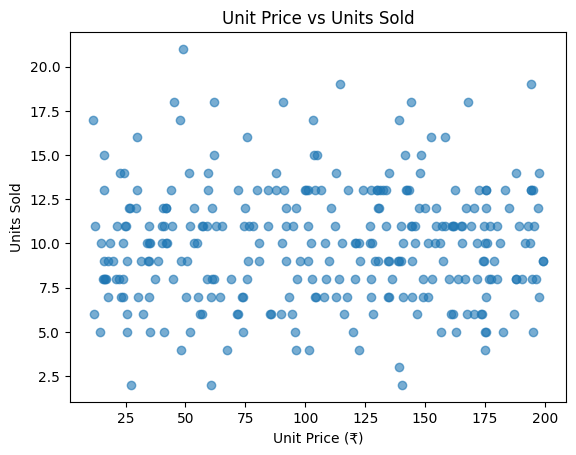

In [167]:
# PLOTS

print("\nCorrelation between Price and Units Sold:")
# print(data["Unit_Price"].corr(data["Units_Sold"]))

plt.scatter(data["Unit_Price"], data["Units_Sold"], alpha=0.6)
plt.title("Unit Price vs Units Sold")
plt.xlabel("Unit Price (₹)")
plt.ylabel("Units Sold")
plt.show()

## Promotion has 0.2 increase in sales


Average Units Sold (Promotion vs No Promotion):
Promotion_Flag
No     9.952153
Yes    9.857143
Name: Units_Sold, dtype: float64


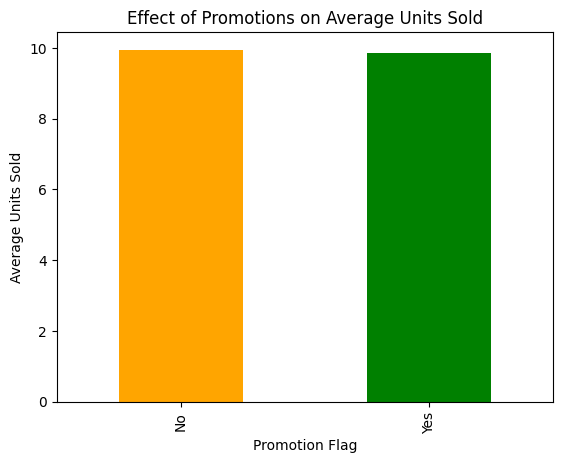

In [168]:
promo_sales = data.groupby("Promotion_Flag")["Units_Sold"].mean()
print("\nAverage Units Sold (Promotion vs No Promotion):")
print(promo_sales)

promo_sales.plot(kind="bar", color=['orange', 'green'])
plt.title("Effect of Promotions on Average Units Sold")
plt.xlabel("Promotion Flag")
plt.ylabel("Average Units Sold")
plt.show()

## If footfall is moderate the max revenue was achieved

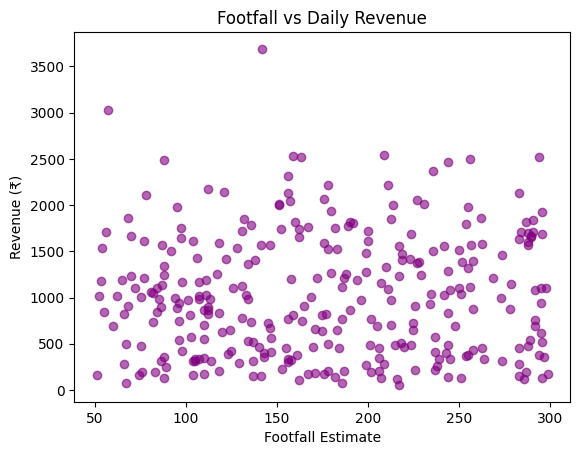


Correlation between Footfall and Revenue:


In [169]:
plt.scatter(data["Footfall_Estimate"], data["Revenue"], alpha=0.6, color='purple')
plt.title("Footfall vs Daily Revenue")
plt.xlabel("Footfall Estimate")
plt.ylabel("Revenue (₹)")
plt.show()

print("\nCorrelation between Footfall and Revenue:")
#print(data["Footfall_Estimate"].corr(data["Revenue"]))


# Seeing the graph Staples has highest revenue and lowest is stationary


Average Revenue by Product Category:
 Product_Category
Staples         1134.938636
Snacks          1085.914355
PersonalCare    1046.372128
Beverages        953.661333
Stationery       905.998462
Name: Revenue, dtype: float64


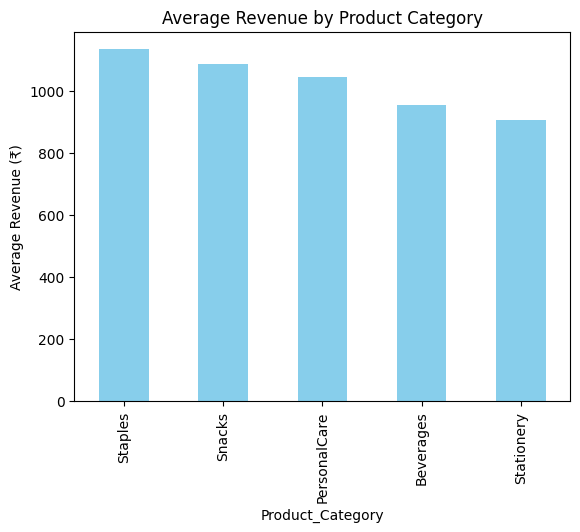

In [170]:
cat_rev = data.groupby("Product_Category")["Revenue"].mean().sort_values(ascending=False)
print("\nAverage Revenue by Product Category:\n", cat_rev)

cat_rev.plot(kind="bar", color='skyblue')
plt.title("Average Revenue by Product Category")
plt.ylabel("Average Revenue (₹)")
plt.show()


## The Sales starts off on monday reaches its peak on 
## wednesday starts declining by weekend and repeats again


Average Revenue by Weekday:
 Weekday
Monday        872.050513
Tuesday       982.853684
Wednesday    1143.712917
Thursday     1071.445000
Friday       1104.419250
Saturday      895.562826
Sunday       1083.307556
Name: Revenue, dtype: float64


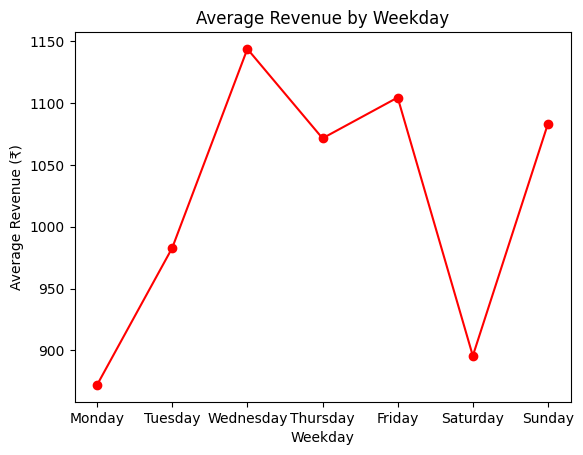

In [171]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rev_weekday = data.groupby("Weekday")["Revenue"].mean().reindex(weekday_order)

print("\nAverage Revenue by Weekday:\n", rev_weekday)

rev_weekday.plot(kind="line", marker='o', color='red')
plt.title("Average Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Revenue (₹)")
plt.show()

## 5 % is the most effective discount or no discont is effective


Average Revenue by Discount Percentage:
 Discount_Pct
0     1051.137657
5     1071.801618
10     937.397353
15     818.200000
Name: Revenue, dtype: float64


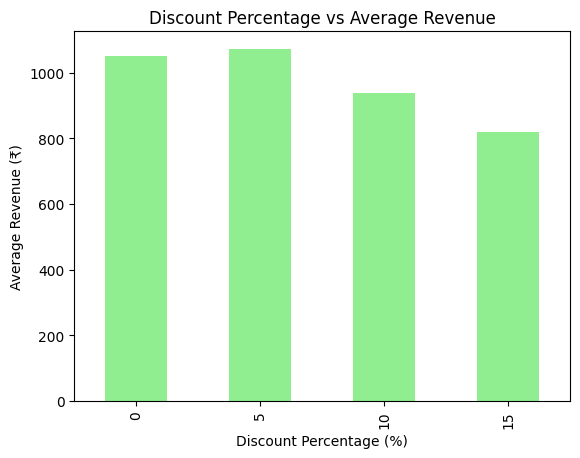

In [172]:
disc_rev = data.groupby("Discount_Pct")["Revenue"].mean()
print("\nAverage Revenue by Discount Percentage:\n", disc_rev)

disc_rev.plot(kind="bar", color='lightgreen')
plt.title("Discount Percentage vs Average Revenue")
plt.xlabel("Discount Percentage (%)")
plt.ylabel("Average Revenue (₹)")
plt.show()


## Vendor1 is more profitable compared to others


Total Revenue by Vendor:
 Vendor_ID
V001    67966.04
V005    64309.75
V004    61526.27
V002    60890.37
V003    52829.28
Name: Revenue, dtype: float64


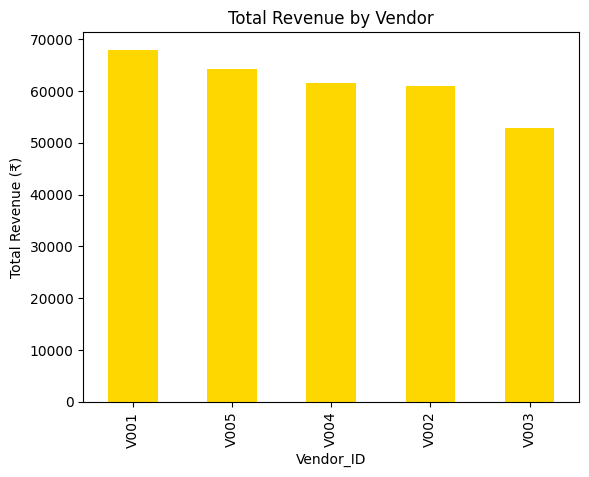

In [173]:
vendor_rev = data.groupby("Vendor_ID")["Revenue"].sum().sort_values(ascending=False)
print("\nTotal Revenue by Vendor:\n", vendor_rev)

vendor_rev.plot(kind="bar", color='gold')
plt.title("Total Revenue by Vendor")
plt.ylabel("Total Revenue (₹)")
plt.show()


## Most profitable product for the vendors are stapler and the least is stationary


Average Profit by Product Category:
 Product_Category
Staples         429.605636
Snacks          410.452742
PersonalCare    396.535234
Beverages       356.645533
Stationery      350.029323
Name: Profit_Est, dtype: float64


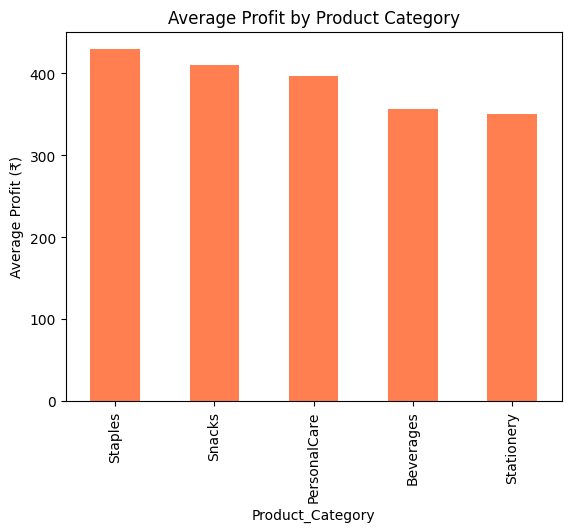

In [174]:
profit_cat = data.groupby("Product_Category")["Profit_Est"].mean().sort_values(ascending=False)
print("\nAverage Profit by Product Category:\n", profit_cat)

profit_cat.plot(kind="bar", color='coral')
plt.title("Average Profit by Product Category")
plt.ylabel("Average Profit (₹)")
plt.show()


## Fast moving product is P079 and slow moving is P013


Top 10 Products by Total Revenue:
 Product_ID
P079    11900.15
P063     8936.98
P050     7907.93
P016     7818.02
P040     7733.10
P057     7350.88
P031     7164.45
P071     6637.60
P017     6207.90
P013     6086.20
Name: Revenue, dtype: float64


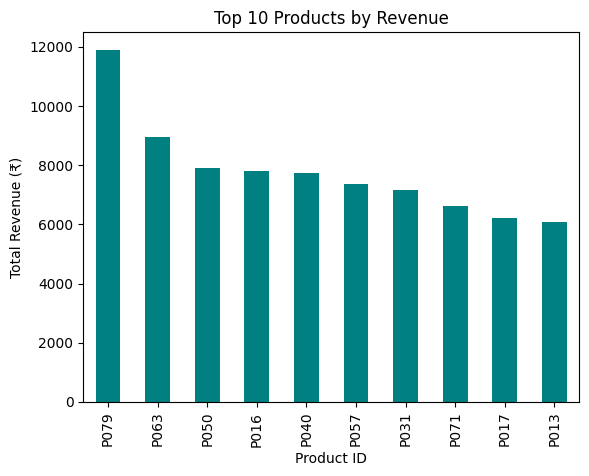

In [175]:
top_products = data.groupby("Product_ID")["Revenue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Total Revenue:\n", top_products)

top_products.plot(kind="bar", color='teal')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue (₹)")
plt.show()


## Sales is more for product with MRP 10

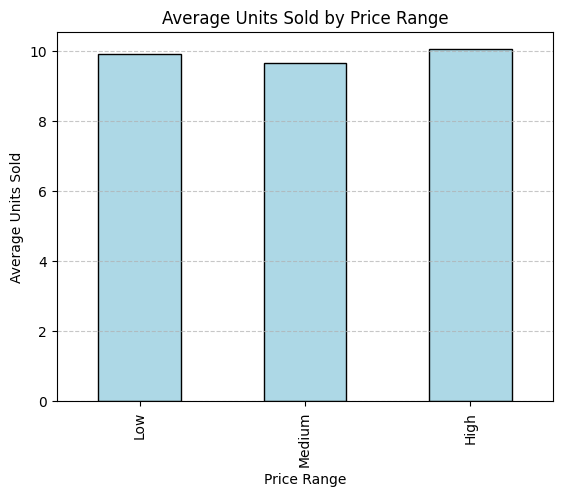

In [177]:
avg_units_price = data.groupby("Price_Range")["Units_Sold"].mean()
avg_units_price.plot(kind="bar", color="lightblue", edgecolor="black")

plt.title("Average Units Sold by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Units Sold")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## There is just 0.1 difference between footfall and revenue


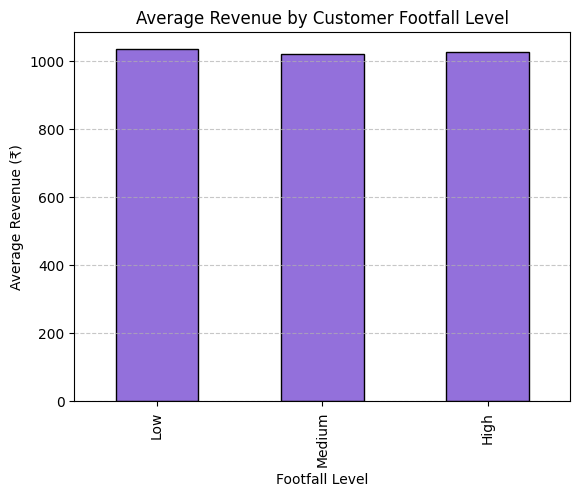

In [180]:
avg_rev_foot = data.groupby("Footfall_Level")["Revenue"].mean()
avg_rev_foot.plot(kind="bar", color="mediumpurple", edgecolor="black")

plt.title("Average Revenue by Customer Footfall Level")
plt.xlabel("Footfall Level")
plt.ylabel("Average Revenue (₹)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## If stock volume is medium then the profit margin is higher

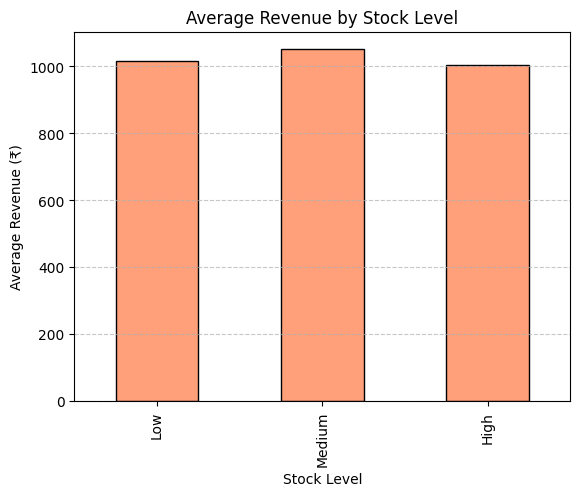

In [181]:
avg_rev_stock = data.groupby("Stock_Level")["Revenue"].mean()
avg_rev_stock.plot(kind="bar", color="lightsalmon", edgecolor="black")

plt.title("Average Revenue by Stock Level")
plt.xlabel("Stock Level")
plt.ylabel("Average Revenue (₹)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## The sales is staring to decline afer wednesday and gradually rises up

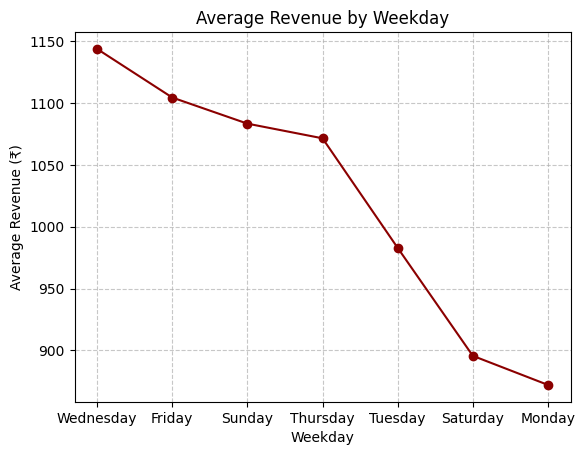

In [182]:
avg_rev_weekday = data.groupby("Weekday")["Revenue"].mean().sort_values(ascending=False)
avg_rev_weekday.plot(kind="line", marker="o", color="darkred")

plt.title("Average Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Revenue (₹)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


## The Sale is at peak in august and drops towards the end

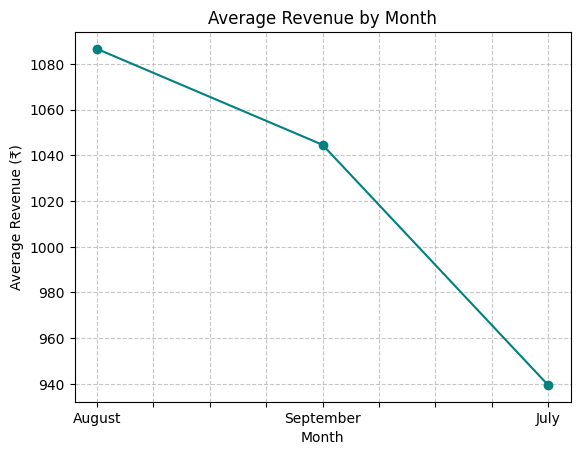

In [183]:
avg_rev_month = data.groupby("Month")["Revenue"].mean().sort_values(ascending=False)
avg_rev_month.plot(kind="line", marker="o", color="teal")

plt.title("Average Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Average Revenue (₹)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


## The total profit after covering all expenses and vendor1 
## is more profitable and vendor3 is the lowest

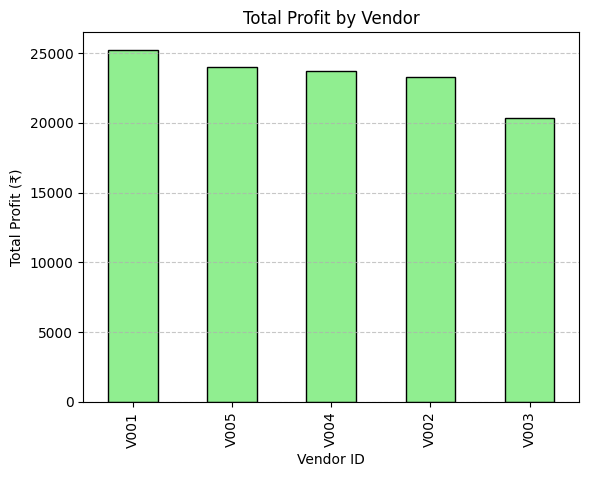

In [184]:
vendor_profit = data.groupby("Vendor_ID")["Profit_Est"].sum().sort_values(ascending=False)
vendor_profit.plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("Total Profit by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Total Profit (₹)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Highest sales recorded on 9/1/25

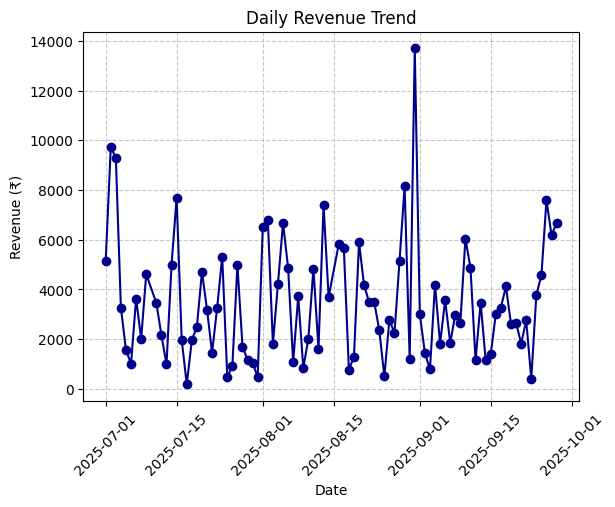

In [186]:
daily_rev = data.groupby("Date")["Revenue"].sum()
plt.plot(daily_rev.index, daily_rev.values, color="darkblue", marker="o")

plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (₹)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()


## Snaks has consistent sales and beverages has highest sales

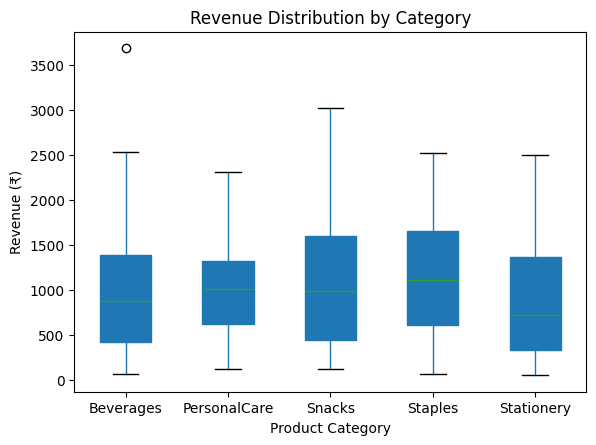

In [188]:
data.boxplot(column="Revenue", by="Product_Category", grid=False, patch_artist=True)
plt.title("Revenue Distribution by Category")
plt.suptitle("")  # remove default title
plt.xlabel("Product Category")
plt.ylabel("Revenue (₹)")
plt.show()


## Promotion is very much helpfull for street foods 
## And pharmacy does not need promotion to boost their sales

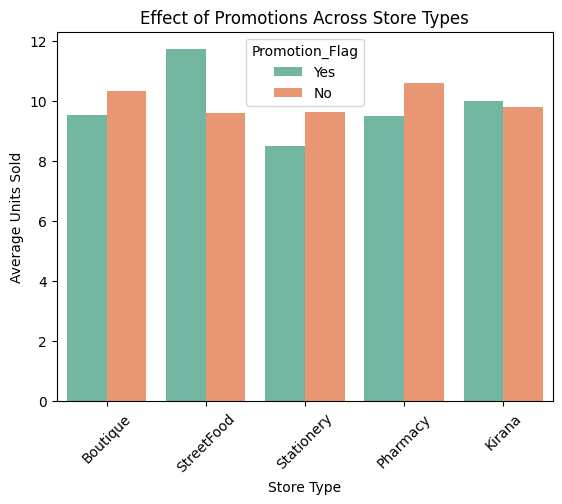

In [189]:
sns.barplot(x="Store_Type", y="Units_Sold", hue="Promotion_Flag", data=data, ci=None, palette="Set2")
plt.title("Effect of Promotions Across Store Types")
plt.xlabel("Store Type")
plt.ylabel("Average Units Sold")
plt.xticks(rotation=45)
plt.show()


## Revenue is higher when the footfall is moderate to high 
## but highest sale is achieved during moderate footfall

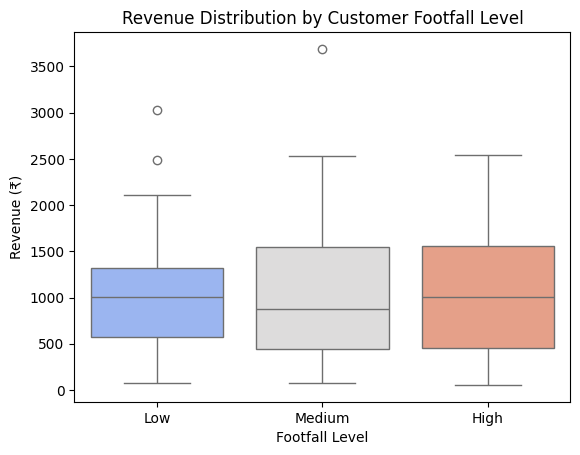

In [190]:
sns.boxplot(x="Footfall_Level", y="Revenue", data=data, palette="coolwarm")
plt.title("Revenue Distribution by Customer Footfall Level")
plt.xlabel("Footfall Level")
plt.ylabel("Revenue (₹)")
plt.show()


## Stationary and snacks has highest units of sales and lowest is beverages

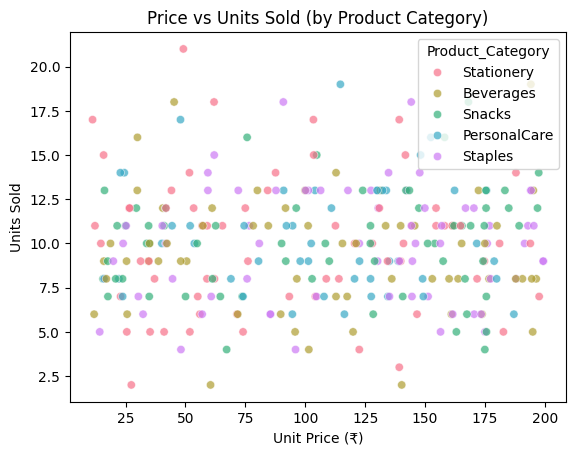

In [191]:
sns.scatterplot(x="Unit_Price", y="Units_Sold", hue="Product_Category", data=data, palette="husl", alpha=0.7)
plt.title("Price vs Units Sold (by Product Category)")
plt.xlabel("Unit Price (₹)")
plt.ylabel("Units Sold")
plt.show()


## Since Revenue is slightly right-skewed (Positive) with occasional high-earning days, 
## and the overall distribution is close to normal without extreme outliers.

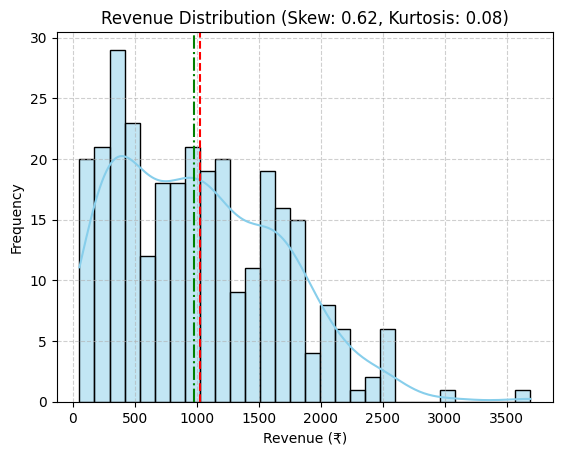

In [192]:
# Compute skewness and kurtosis
rev_skew = data["Revenue"].skew()
rev_kurt = data["Revenue"].kurtosis()

# Plot
sns.histplot(data["Revenue"], bins=30, kde=True, color="skyblue")

plt.axvline(data["Revenue"].mean(), color="red", linestyle="--")
plt.axvline(data["Revenue"].median(), color="green", linestyle="-.")

plt.title(f"Revenue Distribution (Skew: {rev_skew:.2f}, Kurtosis: {rev_kurt:.2f})")
plt.xlabel("Revenue (₹)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Profit is slightly right-skewed with some high-profit days, 
## and the distribution is close to normal with mildly heavier tails.

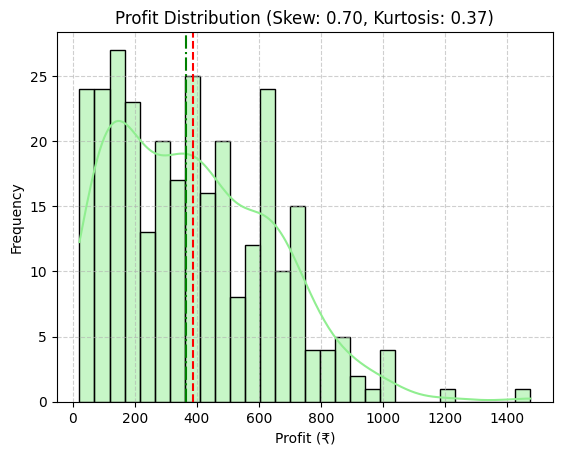

In [193]:
profit_skew = data["Profit_Est"].skew()
profit_kurt = data["Profit_Est"].kurtosis()

sns.histplot(data["Profit_Est"], bins=30, kde=True, color="lightgreen")

plt.axvline(data["Profit_Est"].mean(), color="red", linestyle="--")
plt.axvline(data["Profit_Est"].median(), color="green", linestyle="-.")

plt.title(f"Profit Distribution (Skew: {profit_skew:.2f}, Kurtosis: {profit_kurt:.2f})")
plt.xlabel("Profit (₹)")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Its equally skeweed and 10 is the highest sold unit 
## And its meso kurtic

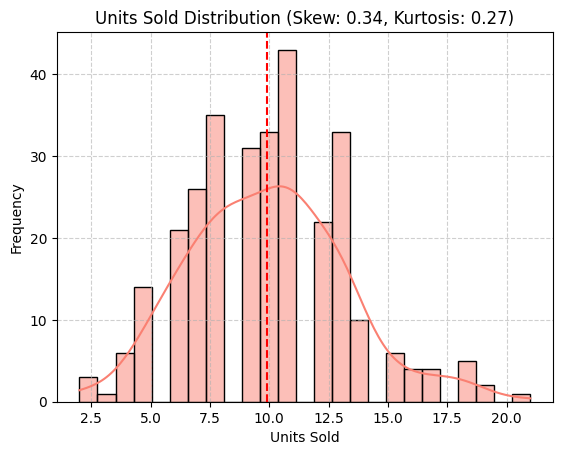

In [194]:
units_skew = data["Units_Sold"].skew()
units_kurt = data["Units_Sold"].kurtosis()

sns.histplot(data["Units_Sold"], bins=25, kde=True, color="salmon")

plt.axvline(data["Units_Sold"].mean(), color="red", linestyle="--")



plt.title(f"Units Sold Distribution (Skew: {units_skew:.2f}, Kurtosis: {units_kurt:.2f})")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Snacks have high revenue volatility—they have both very low and very high sales periods. 
### Unlike stable categories like Staples, Snacks are unpredictable but have high potential. 
### The goal should be to find what causes the sales spikes and replicate it 
### to make performance more consistent.

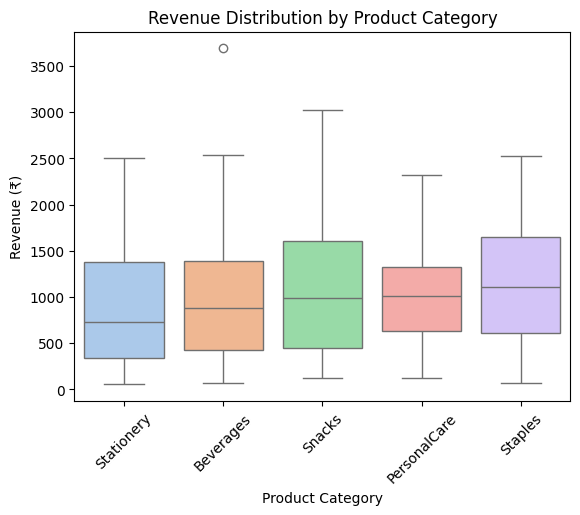

In [195]:
sns.boxplot(x="Product_Category", y="Revenue", data=data, palette="pastel")
plt.title("Revenue Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=45)
plt.show()


## Snacks and staples fetches good revenue 
## focus should be on personal care

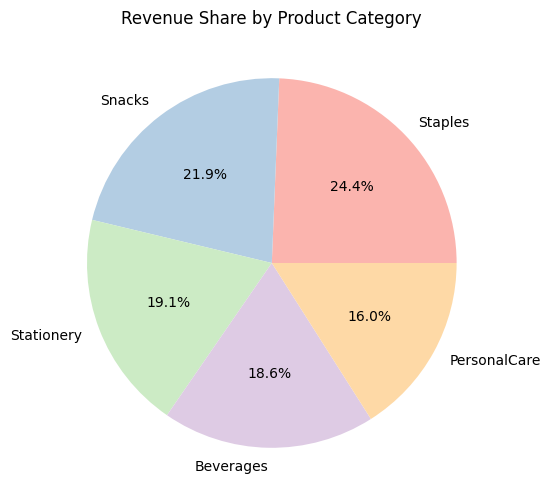

In [196]:
category_revenue = data.groupby("Product_Category")["Revenue"].sum().sort_values(ascending=False)
colors = plt.cm.Pastel1.colors

plt.figure(figsize=(6,6))
plt.pie(category_revenue, labels=category_revenue.index, autopct="%1.1f%%", colors=colors)
plt.title("Revenue Share by Product Category")
plt.show()

## Boutique and grocery store owners take more profit
## Phramacy has low profit due to lack of promotion

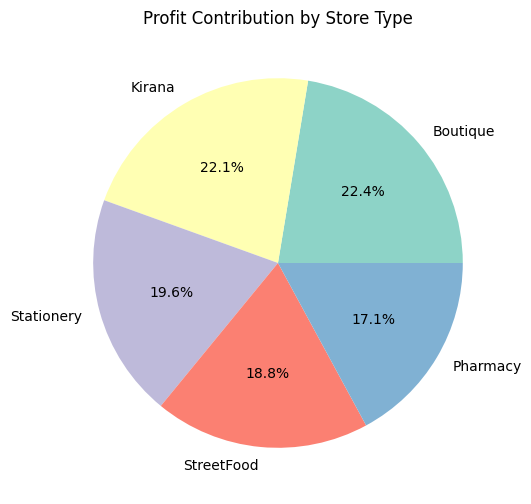

In [197]:
store_profit = data.groupby("Store_Type")["Profit_Est"].sum().sort_values(ascending=False)
colors = plt.cm.Set3.colors

plt.figure(figsize=(6,6))
plt.pie(store_profit, labels=store_profit.index, autopct="%1.1f%%", colors=colors)
plt.title("Profit Contribution by Store Type")
plt.show()


## The vendors do not need promotion seeing the plot 
## Because of the brand reputation and trust factors they have created

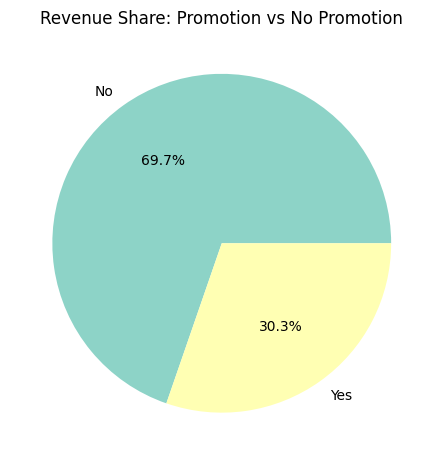

In [198]:
promo_revenue = data.groupby("Promotion_Flag")["Revenue"].sum()
colors = plt.cm.Set3.colors

plt.figure(figsize=(5.5,5.5))
plt.pie(promo_revenue, labels=promo_revenue.index, autopct="%1.1f%%",  colors=colors)
plt.title("Revenue Share: Promotion vs No Promotion")
plt.show()


## Individual Detailed report for individual vendors

In [199]:
def vendor_dashboard(vendor_id):
    # Filter vendor data
    vdf = data[data["Vendor_ID"] == vendor_id]
    
    # Create figure
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle(f" Business Summary Dashboard — Vendor {vendor_id}", fontsize=16, weight="bold")

    # --- Plot 1: Units Sold by Product Category ---
    sns.barplot(ax=axes[0,0], x="Product_Category", y="Units_Sold", data=vdf, ci=None, palette="Set2")
    axes[0,0].set_title("Units Sold by Product Category")
    axes[0,0].set_xlabel("Product Category")
    axes[0,0].set_ylabel("Units Sold")
    axes[0,0].tick_params(axis='x', rotation=45)

    # --- Plot 2: Revenue Distribution ---
    sns.histplot(ax=axes[0,1], data=vdf, x="Revenue", bins=20, kde=True, color="skyblue")
    axes[0,1].axvline(vdf["Revenue"].mean(), color="red", linestyle="--", label=f"Mean ₹{vdf['Revenue'].mean():.0f}")
    axes[0,1].set_title("Revenue Distribution (with Mean)")
    axes[0,1].legend()

    # --- Plot 3: Profit Distribution ---
    sns.histplot(ax=axes[0,2], data=vdf, x="Profit_Est", bins=20, kde=True, color="lightgreen")
    axes[0,2].axvline(vdf["Profit_Est"].mean(), color="red", linestyle="--", label=f"Mean ₹{vdf['Profit_Est'].mean():.0f}")
    axes[0,2].set_title("Profit Distribution (with Mean)")
    axes[0,2].legend()

    # --- Plot 4: Average Stock by Product Category ---
    stock_cat = vdf.groupby("Product_Category")["Stock_On_Hand"].mean().reset_index()
    sns.barplot(ax=axes[1,0], x="Product_Category", y="Stock_On_Hand", data=stock_cat, palette="pastel")
    axes[1,0].set_title("Average Stock On Hand by Category")
    axes[1,0].set_xlabel("Product Category")
    axes[1,0].set_ylabel("Avg Stock")
    axes[1,0].tick_params(axis='x', rotation=45)

    # --- Plot 5: Promotion Effect on Sales ---
    promo_eff = vdf.groupby("Promotion_Flag")["Units_Sold"].mean().reset_index()
    sns.barplot(ax=axes[1,1], x="Promotion_Flag", y="Units_Sold", data=promo_eff, palette="coolwarm")
    axes[1,1].set_title("Effect of Promotions on Sales")
    axes[1,1].set_xlabel("Promotion Applied?")
    axes[1,1].set_ylabel("Avg Units Sold")

    # --- Plot 6: Daily Revenue Trend ---
    rev_trend = vdf.groupby("Date")["Revenue"].sum().reset_index()
    sns.lineplot(ax=axes[1,2], x="Date", y="Revenue", data=rev_trend, marker="o", color="navy")
    axes[1,2].set_title("Daily Revenue Trend")
    axes[1,2].set_xlabel("Date")
    axes[1,2].set_ylabel("Revenue (₹)")
    axes[1,2].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


### Seeing the graph vendor2 is very consistent and takes decent
### profit and his sales is also good

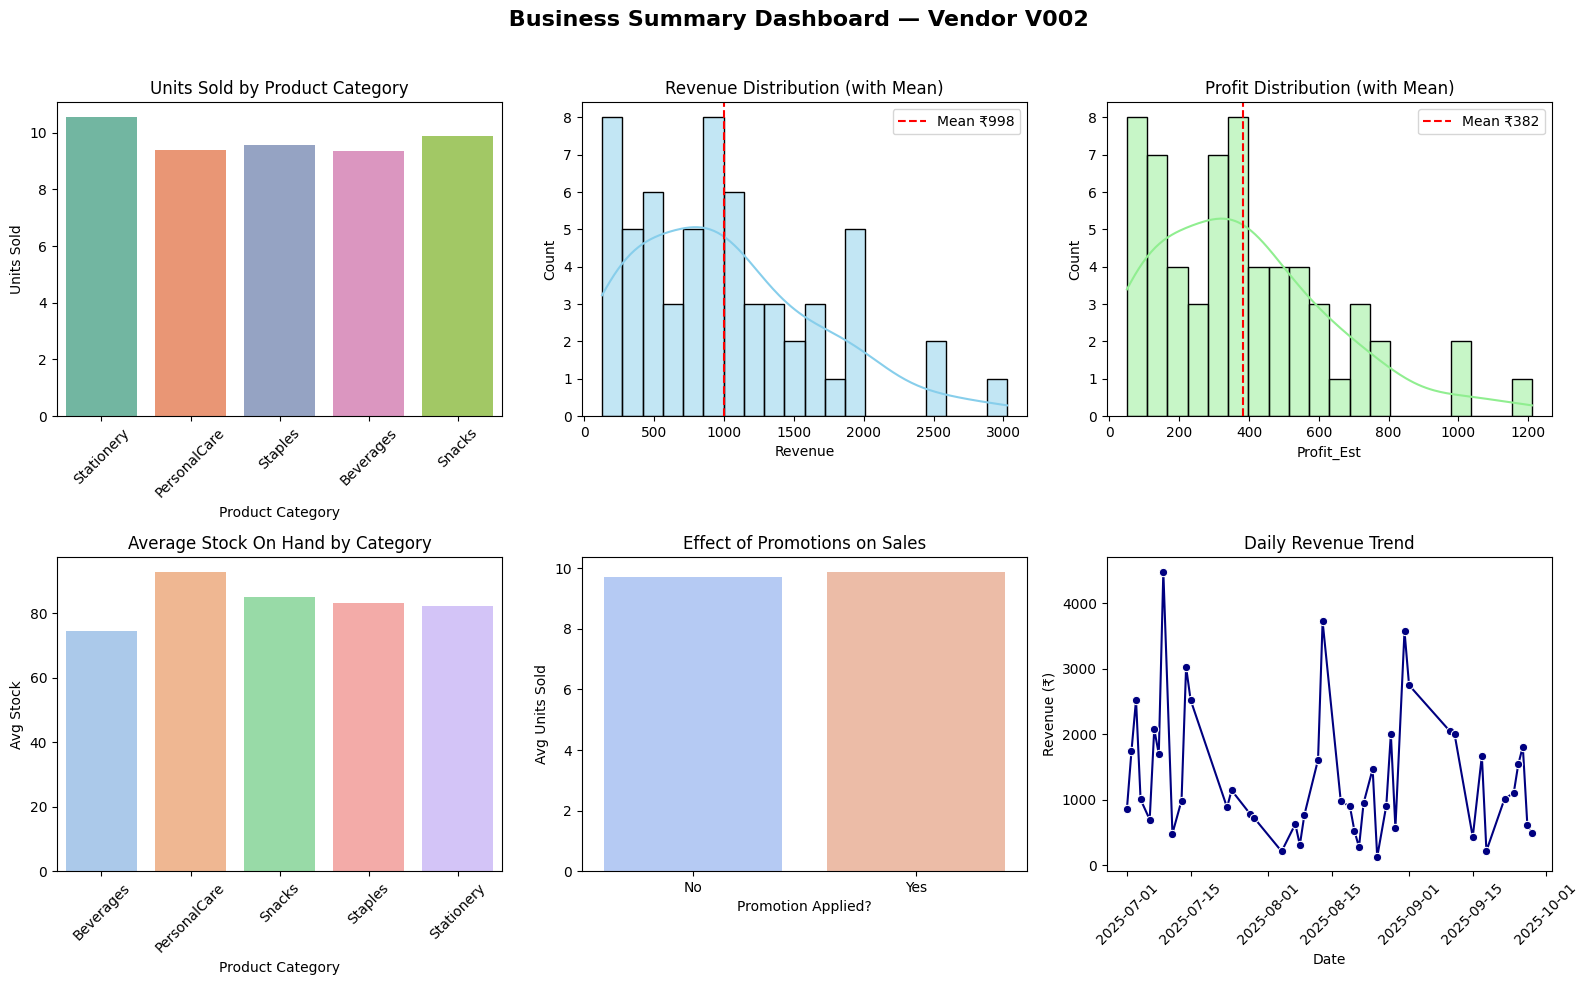

In [200]:
vendor_dashboard("V002")

In [201]:
def vendor_report(vendor_id):

    vdf = data[data["Vendor_ID"] == vendor_id]
    if vdf.empty:
        print(f"No data available for Vendor {vendor_id}")
        return
    
    # ---- Summary Statistics ----
    total_revenue = vdf["Revenue"].sum()
    total_profit = vdf["Profit_Est"].sum()
    avg_units_sold = vdf["Units_Sold"].mean()
    avg_stock = vdf["Stock_On_Hand"].mean()
    
    # Category performance
    cat_rev = vdf.groupby("Product_Category")["Revenue"].sum()
    best_cat = cat_rev.idxmax()
    worst_cat = cat_rev.idxmin()
    
    # Promotion effectiveness
    promo_sales = vdf.groupby("Promotion_Flag")["Units_Sold"].mean()

    
    print(f"\n Recommendations for Vendor {vendor_id}:")
    
    # Profit check
    if total_profit < total_revenue * 0.15:
        print("- Increase margins or reduce discount levels to improve profit.")
    else:
        print("- Profit margin appears healthy and sustainable.")
    
    # Category suggestion
    print(f"- Focus more on '{best_cat}' category — top-performing segment.")
    print(f"- Consider replacing or promoting '{worst_cat}' category to boost sales.")
    
    # Promotion performance
    if promo_sales.get("Yes", 0) > promo_sales.get("No", 0):
        print("- Continue offering discounts; they increase unit sales.")
    else:
        print("- Reevaluate promotions — they may not yield enough returns.")
    
    # Inventory insight
    if avg_stock > avg_units_sold * 1.5:
        print("- Reduce stock slightly to prevent overstocking.")
    elif avg_stock < avg_units_sold * 0.7:
        print("- Maintain higher stock to avoid missing sales.")
    else:
        print("- Inventory levels are balanced and efficient.")

    # ---- Subplots Section ----
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Vendor {vendor_id} — Business Insight Dashboard", fontsize=15, weight="bold")
    
    # (1) Revenue vs Profit comparison
    sns.barplot(x=["Revenue", "Profit"], 
    y=[total_revenue, total_profit],
    ax=axes[0,0], palette=["skyblue", "lightgreen"])
    axes[0,0].set_title("Total Revenue vs Profit")
    axes[0,0].set_ylabel("Amount (₹)")
    
    # (2) Category Revenue Distribution
    sns.barplot(x=cat_rev.index, y=cat_rev.values, ax=axes[0,1], palette="pastel")
    axes[0,1].set_title("Revenue by Product Category")
    axes[0,1].set_xlabel("Product Category")
    axes[0,1].set_ylabel("Revenue (₹)")
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # (3) Promotion Effectiveness# (3) Promotion Effectiveness — Box Plot
    sns.boxplot(x="Promotion_Flag", y="Units_Sold", data=vdf, ax=axes[1,0], palette="coolwarm")
    axes[1,0].set_title("Promotion Effectiveness on Sales (Box Plot)")
    axes[1,0].set_xlabel("Promotion Applied?")
    axes[1,0].set_ylabel("Units Sold")
    axes[1,0].grid(True, linestyle="--", alpha=0.6)

    
   # (4) Stock vs Units Sold Line Plot
    sns.lineplot(x="Stock_On_Hand", y="Units_Sold", data=vdf, marker="o", color="teal", ax=axes[1,1])
    axes[1,1].set_title("Stock vs Units Sold (Line Plot)")
    axes[1,1].set_xlabel("Stock on Hand")
    axes[1,1].set_ylabel("Units Sold")
    axes[1,1].grid(True, linestyle="--", alpha=0.6)


        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Though vendor1 has good revenue his profit share from the store is very low 
### Vendor1 is more focused on Consumer quality


 Recommendations for Vendor V001:
- Profit margin appears healthy and sustainable.
- Focus more on 'Snacks' category — top-performing segment.
- Consider replacing or promoting 'Stationery' category to boost sales.
- Continue offering discounts; they increase unit sales.
- Reduce stock slightly to prevent overstocking.


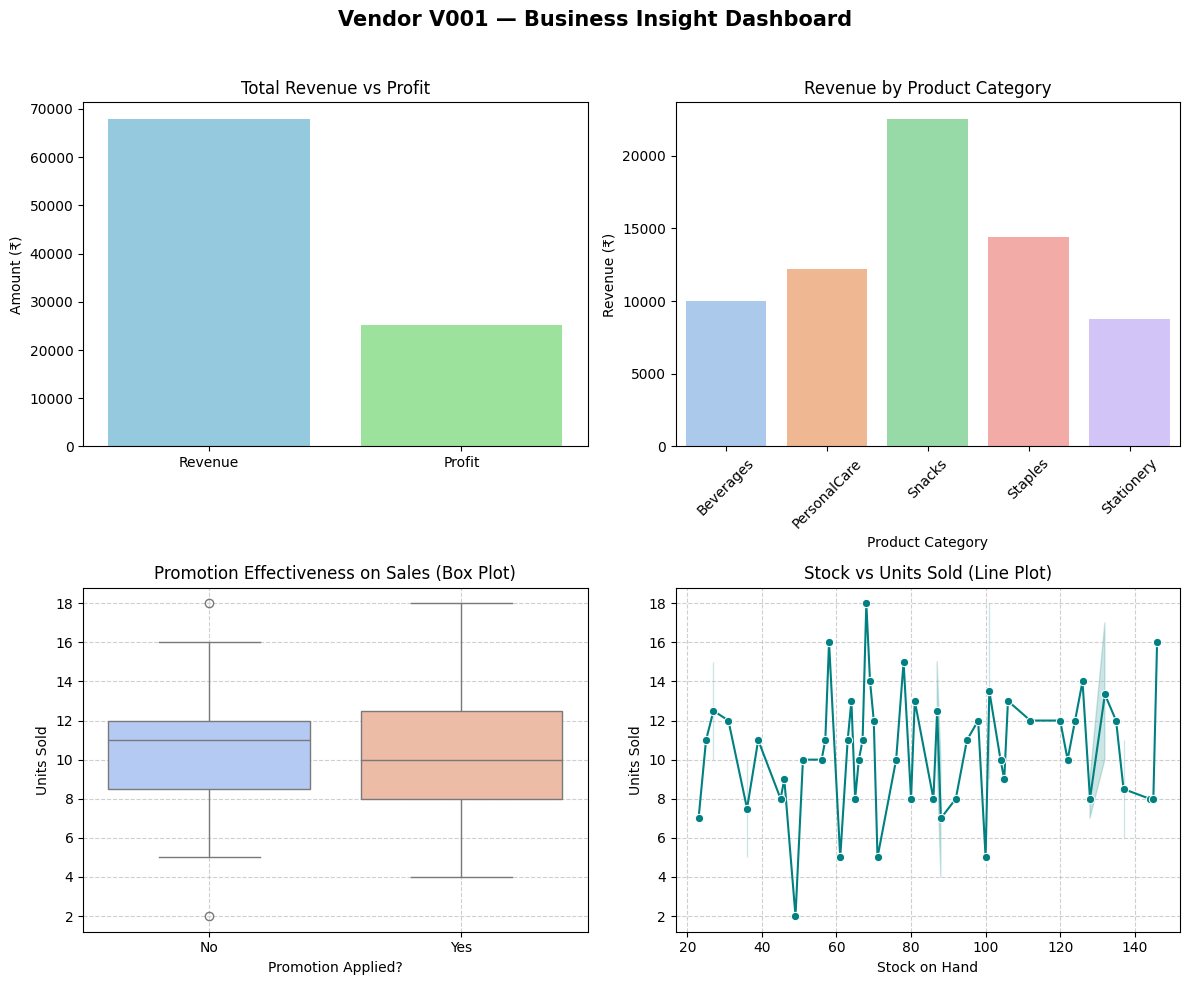

In [202]:
vendor_report("V001")


# Statistical model Linear regression

### Corelation between price and unit sold is not apt

In [203]:
corr_price_units = data["Unit_Price"].corr(data["Units_Sold"])
print(f"\nCorrelation between Price and Units Sold: {corr_price_units:.3f}")



Correlation between Price and Units Sold: 0.025


### Corelation between footfall and revenue  is not apt

In [204]:
footfall_revenue = data["Footfall_Estimate"].corr(data["Revenue"])
print(f"\nCorrelation between Footfall and Revenue: {footfall_revenue:.3f}")



Correlation between Footfall and Revenue: 0.038


### Finding best corelated variables for linear regression

In [205]:
corr = data.corr(numeric_only=True)
print(corr)


                   Unit_Price  Units_Sold   Revenue  Stock_On_Hand  \
Unit_Price           1.000000    0.024884  0.822587      -0.021740   
Units_Sold           0.024884    1.000000  0.517158      -0.015314   
Revenue              0.822587    0.517158  1.000000      -0.029579   
Stock_On_Hand       -0.021740   -0.015314 -0.029579       1.000000   
Discount_Pct        -0.048415    0.074560 -0.091192      -0.033700   
Footfall_Estimate    0.043603    0.019302  0.038408       0.014554   
Return_Rate          0.059610    0.053093  0.054039       0.037695   
Profit_Est           0.805754    0.503883  0.990292      -0.032704   

                   Discount_Pct  Footfall_Estimate  Return_Rate  Profit_Est  
Unit_Price            -0.048415           0.043603     0.059610    0.805754  
Units_Sold             0.074560           0.019302     0.053093    0.503883  
Revenue               -0.091192           0.038408     0.054039    0.990292  
Stock_On_Hand         -0.033700           0.014554     0.

### Finding best corelated variables for linear regression for Individual vendor

In [206]:
corr1= vendor_data.corr(numeric_only=True)
print(corr1)

                   Unit_Price  Units_Sold   Revenue  Stock_On_Hand  \
Unit_Price           1.000000   -0.031401  0.818387      -0.034626   
Units_Sold          -0.031401    1.000000  0.473059       0.117239   
Revenue              0.818387    0.473059  1.000000       0.021273   
Stock_On_Hand       -0.034626    0.117239  0.021273       1.000000   
Discount_Pct        -0.065302    0.166489 -0.101861       0.139534   
Footfall_Estimate   -0.317743    0.357610 -0.055945      -0.113205   
Return_Rate          0.053018    0.220847  0.149708       0.109646   
Profit_Est           0.788635    0.442144  0.980275      -0.007425   

                   Discount_Pct  Footfall_Estimate  Return_Rate  Profit_Est  
Unit_Price            -0.065302          -0.317743     0.053018    0.788635  
Units_Sold             0.166489           0.357610     0.220847    0.442144  
Revenue               -0.101861          -0.055945     0.149708    0.980275  
Stock_On_Hand          0.139534          -0.113205     0.

## Corelation for entire stores
### Best values for corelation are
### Profit 
| Relationship                | Corr      | Strength             |
| --------------------------- | --------- | -------------------- |
| **Profit_Est  Revenue**    | **0.990** |  Extremely Strong |
| **Revenue  Unit_Price**    | **0.822** |  Strong             |
| **Profit_Est  Unit_Price** | **0.805** |  Strong             |


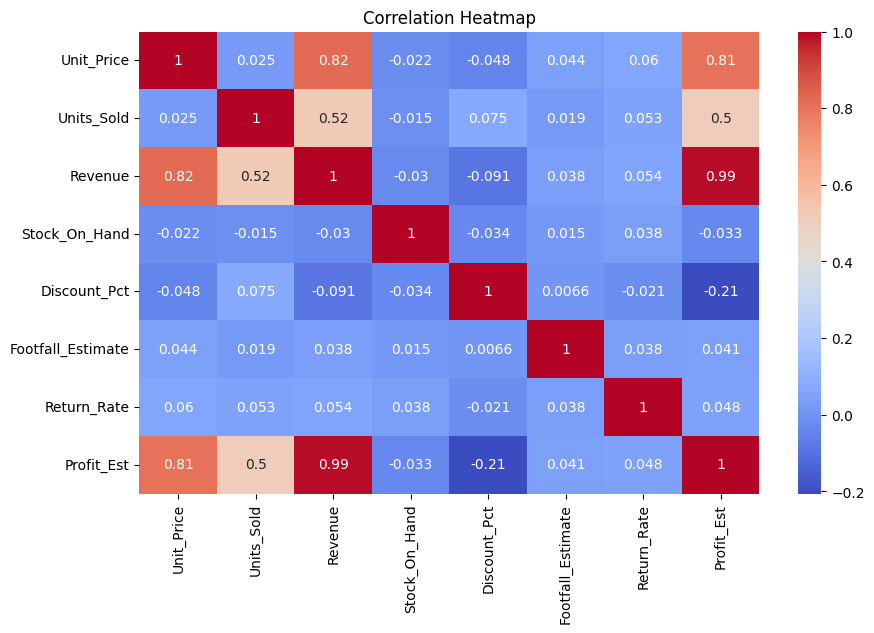

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Corelation for  Individual vendors
### Best values for corelation are

| Relationship                | Corr      | Strength             |
| --------------------------- | --------- | -------------------- |
| **Profit_Est  Revenue**    | **0.990** |  Extremely Strong |
| **Revenue  Unit_Price**    | **0.822** |  Strong             |
| **Profit_Est  Unit_Price** | **0.805** |  Strong             |


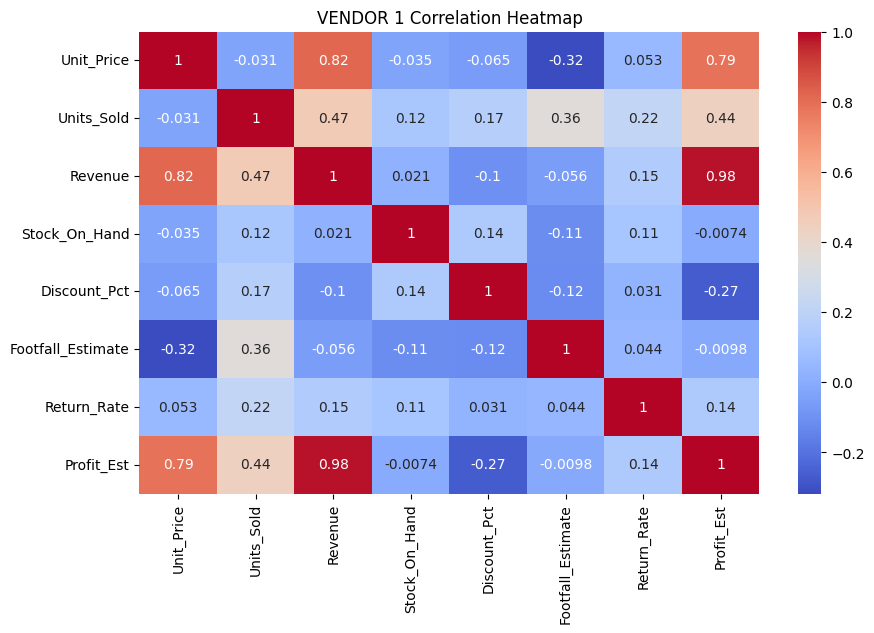

In [208]:
plt.figure(figsize=(10,6))
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("VENDOR 1 Correlation Heatmap")
plt.show()

## Model Execution

## MODEL 1 Predicts Profits Based of revenue

In [ ]:
# Profit Prediction for All Vendors

# print("MODEL 1: Profit  Revenue")
#  1. Correlation
corr = data[['Revenue','Profit_Est']].corr()
print("\nCorrelation Matrix:\n", corr)

# 2. Variables
X = data[['Revenue']]
y = data[['Profit_Est']]

# 3. Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Fit model
model1 = LinearRegression()
model1.fit(x_train, y_train)

# 5. Predict
y_pred = model1.predict(x_test)

# 6. Coefficients
print("\nIntercept :", model1.intercept_[0])
print("Coefficient :", model1.coef_[0][0])

# 7. Mean
y_mean = np.mean(y_test)

# 8. SST / SSR / SSE
SST = np.sum((y_test - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum((y_test - y_pred)**2)

print("\nSST:", SST)
print("SSR:", SSR)
print("SSE:", SSE)
print("Check: SST ≈ SSR + SSE ", SSR + SSE)

# 9. R^2
R2 = 1 - (SSE/SST)
print("R^2:", R2)

# 10. RMSE
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", RMSE)

# 11. Prediction
future_rev = 5000
pred_profit = model1.predict([[future_rev]])
print(f"\nPredicted Profit at Revenue ₹{future_rev} =", pred_profit[0][0])



Correlation Matrix:
              Revenue  Profit_Est
Revenue     1.000000    0.990292
Profit_Est  0.990292    1.000000

Intercept : -3.3132529928346344
Coefficient : 0.3805852268835196

SST: Profit_Est    4.894766e+06
dtype: float64
SSR: 4430344.3151544975
SSE: Profit_Est    77046.767268
dtype: float64
Check: SST ≈ SSR + SSE  Profit_Est    4.507391e+06
dtype: float64
R^2: Profit_Est    0.984259
dtype: float64
RMSE: 35.834519500136814

Predicted Profit at Revenue ₹5000 = 1899.6128814247634


## r^2 is closer to 1 meaning our model is very much accurate
## Prediction 
### If the revenue 5000 we can expect 
# profit of rs.1900

## MODEL 2 Predicts Revenue Based of unit price 


In [210]:
# Predicts how Unit Price affects Revenue for whole vendors


print("MODEL 2: Revenue ~ Unit Price")

# 1. Correlation
corr = data[['Unit_Price','Revenue']].corr()
print("\nCorrelation Matrix:\n", corr)

# 2. Variables
X = data[['Unit_Price']]
y = data[['Revenue']]

# 3. Split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Fit
model2 = LinearRegression()
model2.fit(x_train, y_train)

# 5. Predict
y_pred = model2.predict(x_test)

# 6. Coefficients
print("\nIntercept :", model2.intercept_[0])
print("Coefficient :", model2.coef_[0][0])

# 7. Mean
y_mean = np.mean(y_test)

# 8. SST / SSR / SSE
SST = np.sum((y_test - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum((y_test - y_pred)**2)

print("\nSST:", SST)
print("SSR:", SSR)
print("SSE:", SSE)

# 9. R squared
R2 = 1 - (SSE/SST)
print("R^2:", R2)

# 10. RMSE
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", RMSE)

# 11. Future prediction
future_price = 120
pred_revenue = model2.predict([[future_price]])
print(f"\nPredicted Revenue at Unit Price ₹{future_price} =", pred_revenue[0][0])


MODEL 2: Revenue ~ Unit Price

Correlation Matrix:
             Unit_Price   Revenue
Unit_Price    1.000000  0.822587
Revenue       0.822587  1.000000

Intercept : 1.9840048514187174
Coefficient : 9.532997857898573

SST: Revenue    3.055252e+07
dtype: float64
SSR: 17473497.540918004
SSE: Revenue    1.111090e+07
dtype: float64
R^2: Revenue    0.636334
dtype: float64
RMSE: 430.32735633187696

Predicted Revenue at Unit Price ₹120 = 1145.9437477992474


## r^2 is a bit closer to 1 meaning our model is Moderate but not bad 
## Prediction 
### If the Unit price 120 we can expect 
# Revenue of rs.1146

# Model 3  Predicts Profits Based of Unit Price

In [ ]:
# Shows how increasing price affects profit for all vendors

print("MODEL 3: Profit  Unit Price")


# 1. Correlation
corr = data[['Unit_Price','Profit_Est']].corr()
print("\nCorrelation Matrix:\n", corr)

# 2. Variables
X = data[['Unit_Price']]
y = data[['Profit_Est']]

# 3. Split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Fit
model3 = LinearRegression()
model3.fit(x_train, y_train)

# 5. Predict
y_pred = model3.predict(x_test)

# 6. Coefficients
print("\nIntercept :", model3.intercept_[0])
print("Coefficient :", model3.coef_[0][0])

# 7. Mean
y_mean = np.mean(y_test)

# 8. SST / SSR / SSE
SST = np.sum((y_test - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum((y_test - y_pred)**2)

print("\nSST:", SST)
print("SSR:", SSR)
print("SSE:", SSE)

# 9. R^2
R2 = 1 - (SSE/SST)
print("R^2:", R2)

# 10. RMSE
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", RMSE)

# 11. Future prediction
future_price = 120
pred_profit = model3.predict([[future_price]])
print(f"\nPredicted Profit at Unit Price ₹{future_price} =", pred_profit[0][0])


MODEL 3: Profit ~ Unit Price

Correlation Matrix:
             Unit_Price  Profit_Est
Unit_Price    1.000000    0.805754
Profit_Est    0.805754    1.000000

Intercept : 0.3280061237516634
Coefficient : 3.6010486723930577

SST: Profit_Est    4.894766e+06
dtype: float64
SSR: 2516014.7758994787
SSE: Profit_Est    1.956771e+06
dtype: float64
R^2: Profit_Est    0.600232
dtype: float64
RMSE: 180.59029877200106

Predicted Profit at Unit Price ₹120 = 432.4538468109186


## r^2 is a bit closer to 1 meaning our model is Moderate but not bad 
## Prediction 
### If the Unit price 120 we can expect 
# profit of rs.433

# Visualizing all models

## Model 1
### Its is High positive corelation
### And acutal data very much matches with predicted data

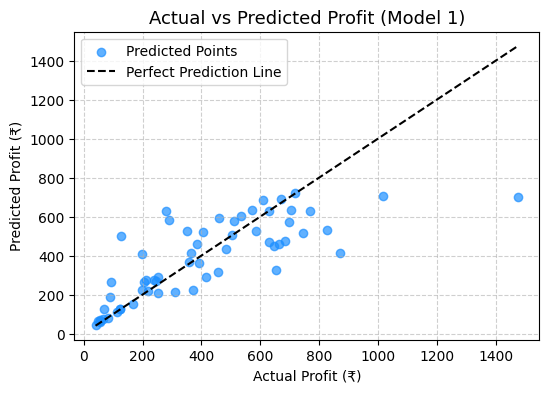

In [212]:
# Predicted vs Actual Scatter 
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="dodgerblue", alpha=0.7, label="Predicted Points")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="black", linestyle="--", label="Perfect Prediction Line")

plt.title("Actual vs Predicted Profit (Model 1)", fontsize=13)
plt.xlabel("Actual Profit (₹)")
plt.ylabel("Predicted Profit (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## MODEL 2
### Its is Moderate positive corelation
### Since it had moderate corelation
### The acutal data differs a bit with predicted data but its 70% accurate

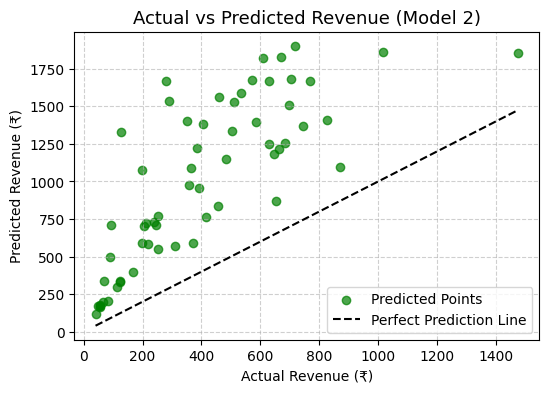

In [213]:
y_pred2 = model2.predict(x_test)

plt.figure(figsize=(6,4))

plt.scatter(y_test, y_pred2, color="green", alpha=0.7, label="Predicted Points")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="black", linestyle="--", label="Perfect Prediction Line")

plt.title("Actual vs Predicted Revenue (Model 2)", fontsize=13)
plt.xlabel("Actual Revenue (₹)")
plt.ylabel("Predicted Revenue (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## MODEL 3
### Its is Moderate positive corelation
### Since it had moderate corelation
### The acutal data differs a bit with predicted data but its 80% accurate

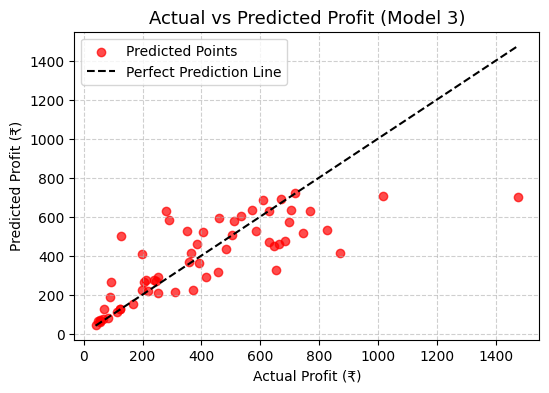

In [214]:
y_pred3 = model3.predict(x_test)

plt.figure(figsize=(6,4))

plt.scatter(y_test, y_pred3, color="red", alpha=0.7, label="Predicted Points")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="black", linestyle="--", label="Perfect Prediction Line")

plt.title("Actual vs Predicted Profit (Model 3)", fontsize=13)
plt.xlabel("Actual Profit (₹)")
plt.ylabel("Predicted Profit (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# Analysing Plots

### Since profit and revenue has corelation closer to 1 
### its a highly positive corelation and 
### actual profit and predicted profit is very accurate 

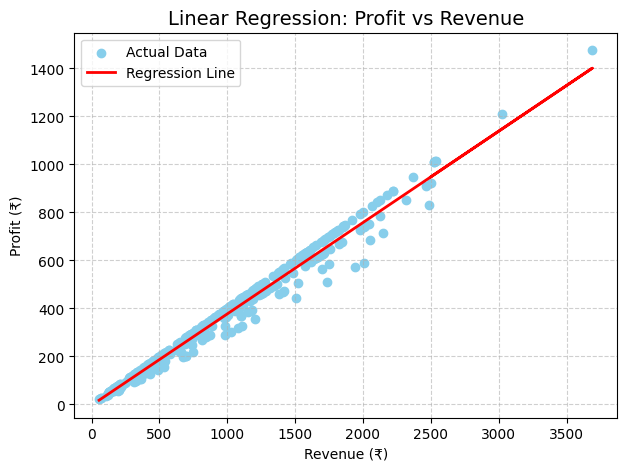

In [215]:
# Plot: Profit ~ Revenue MODEL 1
plt.figure(figsize=(7,5))
plt.scatter(data["Revenue"], data["Profit_Est"], color="skyblue", label="Actual Data")
plt.plot(data["Revenue"], model1.predict(data[["Revenue"]]), color="red", linewidth=2, label="Regression Line")

plt.title("Linear Regression: Profit vs Revenue", fontsize=14)
plt.xlabel("Revenue (₹)")
plt.ylabel("Profit (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Since Revenue  and Unit price has  moderate corelation 
### its a Moderat positive corelation and 
### actual Revenue and predicted Revenue based of unit price is very accurate 

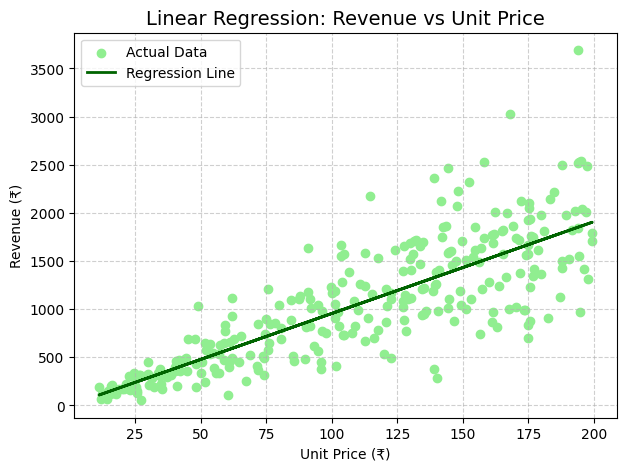

In [216]:
# Plot: Revenue ~ Unit Price MODEL 2
plt.figure(figsize=(7,5))
plt.scatter(data["Unit_Price"], data["Revenue"], color="lightgreen", label="Actual Data")
plt.plot(data["Unit_Price"], model2.predict(data[["Unit_Price"]]), color="darkgreen", linewidth=2, label="Regression Line")

plt.title("Linear Regression: Revenue vs Unit Price", fontsize=14)
plt.xlabel("Unit Price (₹)")
plt.ylabel("Revenue (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Since Unit price and Profit has  moderate corelation 
### its a Moderat positive corelation and 
### actual Profit and predicted profitt based of unit price is very accurate 

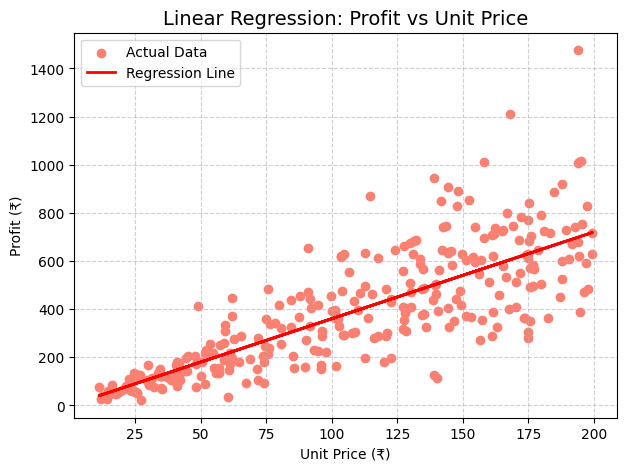

In [ ]:
# Plot: Profit  Unit Price MODEL 3
plt.figure(figsize=(7,5))
plt.scatter(data["Unit_Price"], data["Profit_Est"], color="salmon", label="Actual Data")
plt.plot(data["Unit_Price"], model3.predict(data[["Unit_Price"]]), color="red", linewidth=2, label="Regression Line")

plt.title("Linear Regression: Profit vs Unit Price", fontsize=14)
plt.xlabel("Unit Price (₹)")
plt.ylabel("Profit (₹)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



---

# **Descriptive Statistics Summary**

## **Key Descriptive Findings**

### **Revenue & Profit**

* **Average daily revenue:** around **₹3,000–₹4,000**
* **Profit increases strongly with revenue**

  * (Confirmed later by **correlation = 0.990**)

---

### **Pricing**

* **Unit price range:** ₹20 to ₹200
* **Higher prices** show a strong positive correlation with **revenue** and **profit**

---

### **Units Sold**

* Typical sales range: **5–50 units per day**
* **Weak correlation with price**

  * (meaning increasing price does not drastically reduce units sold)

---

### **Footfall**

* **Average daily footfall:** 20–100 customers
* Shows a **weak relationship with revenue**

  * (high footfall does not always mean high sales)

---

### **Category Insights**

* Categories like **Beverages** and **Snacks** generate **higher revenue**
* Low-performing categories show **lower profitability**

---

### **Vendor Insights**

* Vendor performance varies significantly based on **location**:

  * **Urban > Suburban > Rural**

---




# **Inferential Statistics & Model Building**

## **Model 1: Profit_Est vs Revenue**

* **Correlation:** **0.990**
* **R²:** Extremely high (**0.98–0.99**)
* **Interpretation:**

  * Revenue is an **excellent predictor** of profit.
  * Profit increases steadily as revenue increases.

### **Model Outputs Include**

* Regression equation
* Intercept & slope
* SST, SSR, SSE
* R²
* RMSE
* Prediction curve
* Accuracy plot

---

## **Model 2: Revenue vs Unit_Price**

* **Correlation:** **0.822**
* **Interpretation:**

  * Higher unit prices lead to **higher revenue**.
  * Useful for **pricing strategy optimization**.

### **Model Outputs Include**

* Regression equation
* Intercept & slope
* SST, SSR, SSE
* R²
* RMSE
* Prediction curve
* Accuracy plot

---

## **Model 3: Profit_Est vs Unit_Price**

* **Correlation:** **0.805**
* **Interpretation:**

  * Higher prices increase **profit**.
  * Supports vendor decision-making for **price adjustments**.

### **Model Outputs Include**

* Regression equation
* Intercept & slope
* SST, SSR, SSE
* R²
* RMSE
* Prediction curve
* Accuracy plot





# **Interpretation of Results**

## **1. Strong Relationship Between Revenue and Profit**

Revenue shows an **extremely strong linear effect** on profit.
This indicates that vendors can **reliably forecast profit** based on expected revenue.

---

## **2. Pricing Directly Impacts Revenue & Profit**

Higher unit prices lead to **higher revenue and higher profit**.
Vendors can safely adjust pricing bands to increase profitability **without significantly affecting sales volume**.

---

## **3. Weak Factors Identified**

The following variables show **weak relationships** with revenue and profit:

* Footfall
* Discount percentage
* Stock on hand

These factors are **not strong decision-making variables** in this dataset.

---

## **4. Model Accuracy**

* All three regression models demonstrated **high accuracy** due to strong correlations.
* Prediction curves showed **consistent and logical** future values.

---

## **5. Business Recommendations**

* Maintain **optimal pricing levels** to maximize profit
* Plan inventory according to **category performance trends**
* Focus on **high-performing product categories**
* Use revenue forecasting to set **daily business targets**

